# Reto 1: Machine Learning

## Autor
- Juan Andrés Ruiz Ramírez
- Email: juaruiz@bancolombia.com.co



## Librerias y configuraciones previas

In [1]:
## Importación Librerias
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Modelado y entrenamiento
# ==============================================================================
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import statsmodels.api as sm
#from xgboost import XGBRegressor
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor

from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# path archivo CSV
# ==============================================================================
csv_path='C:/Users/Usuario/Downloads/Reto IAML/Reto IAML/dataset_ML'




## Funciones

In [2]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
#from funciones import multiple_plot, tidy_corr_matrix
from utils.funciones import multiple_plot, plot_roc_curve, tidy_corr_matrix, checkVIF

#Lista de variables categóricas
# ==============================================================================
def vcatList(dataframe):
    catCols = dataframe.select_dtypes(include = ["object", 'category','bool']).columns.tolist()
    return catCols
    
#Lista de variables numericas
# ==============================================================================
def vnumList(dataframe):
    numCols = dataframe.select_dtypes(include = ['float64','int32','int64','uint8']).columns.tolist()
    return numCols

# Función para contruir un modelo de regresión lineal por medio de statsmodels.api
# ==============================================================================
def build_model(X,y):
    #A los datos de entrada 'X' se le adiciona una constante
    X = sm.add_constant(X) 
    #Se crea y se entrena el modelo de regresion lineal q(statsmodels.api) con 
    #los datos de entrada 'X' y los datos de salida 'y'
    lm = sm.OLS(y,X).fit()
    #imprime el resumen del modelo creado
    print(lm.summary()) # model summary
    return X

# 1.1 Ejercicio EDA - Análisis y Preparación de datos

## 1. Carga del dataset

In [3]:
#Cargar el dataset
df=pd.read_csv(csv_path + '/restaurants_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [5]:
#visualización del dataframe
df.head(2)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8


In [6]:
# Ver estadistica de las variables numericas
df.describe()

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
count,3493.000000,3.493000e+03,3394.000000,3437.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3444.000000,...,3281.000000,2728.000000,1010.000000,786.000000,205.000000,3468.000000,3493.000000,3493.000000,3493.00000,3493.000000
mean,61747.000000,3.072571e+07,77.938715,74.404684,0.788720,0.988262,0.808188,0.801889,0.800172,1.926539,...,8.479427,4.012830,2.932673,3.655216,3.590244,6.423010,6.874893,4.546808,3.23132,6.275122
std,1008.486572,2.165125e+07,9.829169,10.940327,0.408275,0.107719,0.393783,0.398633,0.399928,0.260930,...,1.287233,1.009044,0.859519,0.973250,0.906351,2.050026,1.847131,1.877063,1.99305,1.895057
min,60001.000000,3.500000e+06,43.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,60874.000000,1.800000e+07,72.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,7.000000,3.000000,2.000000,3.000000,3.000000,5.000000,6.000000,3.000000,2.00000,5.000000
50%,61747.000000,3.000000e+07,79.000000,74.050000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,7.000000,7.000000,5.000000,3.00000,6.000000
75%,62620.000000,3.700000e+07,85.745000,82.400000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,5.000000,3.000000,4.000000,4.000000,8.000000,8.000000,6.000000,5.00000,8.000000
max,63493.000000,4.000000e+08,97.760000,98.700000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,8.000000,6.000000,7.000000,6.000000,10.000000,10.000000,10.000000,10.00000,10.000000


In [7]:
# Contar columnas por tipo de dato
print(df.dtypes.value_counts())

int64      18
float64     9
object      7
Name: count, dtype: int64


In [8]:
# Clasificar columnas por tipo de dato
print(df.select_dtypes(include=['object']).columns.tolist())

['Cuisine', 'City', 'Restaurant Location', 'Opening Day of Restaurant', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']


Primer Analisis
- El dataset contiene 34 columnas: 7 "categoricas", 18 de tipo "int" y 9 de tipo "float"  
- De las columnas categoricas ('Cuisine', 'City', 'Restaurant Location', 'Opening Day of Restaurant', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme') se puede empezar a analizar que:
    - 'City' y 'Restaurant Location': aunque podrian indicar los lugares con mayor poder adquisitivo ( y por ende mayor facturacion), hay una variable que da puntaje a la locación "Restaurant City Tier" y podria abarcarlas.  
    - 'Opening Day of Restaurant': La antigüedad del restaurante podría relacionarse con reputación e ingresos, pero dada los distintos rating que tiene el dataset, podria no aportar mayor aporte a la cantidad de ingresos del restaurante.  
    - 'Cuisine', 'Restaurant Type' y 'Restaurant Theme': podria agregar ruido al analisis por tener catergorias poco claras,ambiguas, subjetivas y de muchas categorias unicas.  
    - 'Endorsed By': Sin duda puede influir directamente en la popularidad del restaurante lo que influye directamente en más ingresos (que es la variable objetivo).
- Con respecto a los otros tipos de datos (int y float) hay que realizar un analisis más a detalle sobre la naturaleza de cada variable.
    - De entrada se imputará la columna 'Registration Number' dado que es una columna de indices de la DB donde se registraron los restaurantes y no tiene correlacion con las ganancias anuales de cada restaurante.

## 2. Limpieza de datos 

### 2.1 Validación registros duplicados

In [9]:
# Contabilizar la cantidad de registros duplicados (filas identicas)
df.duplicated().sum()

np.int64(0)

In [10]:
# Identificar cantidad de registros duplicados por ID de restaurante
df[df.duplicated(subset='Registration Number', keep=False)]

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy


In [11]:
# Identificar cantidad de registros duplicados por varias columnas
df[df.duplicated(subset=['Cuisine','City','Restaurant Location','Opening Day of Restaurant'], keep=False)]

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
566,60567,37000000,"tibetan,greek",Bangalore,Near Party Hub,20-01-2011,78.00,Tier A Celebrity,69.00,0,...,10.0,5.0,NaN,4.0,NaN,8.0,6,5,2,9
691,60692,40000000,"tibetan,greek",Bangalore,Near Business Hub,07-07-2008,91.00,Not Specific,83.00,0,...,10.0,4.0,NaN,NaN,NaN,5.0,3,1,6,5
791,60792,35000000,"algerian,belgian",Bangalore,Near Party Hub,12-05-2010,NaN,Not Specific,55.54,1,...,9.0,5.0,NaN,NaN,NaN,6.0,6,4,3,5
872,60873,19500000,"tibetan,italian",-1,Near Party Hub,08-09-2009,76.20,Tier A Celebrity,60.20,1,...,8.0,4.0,NaN,NaN,NaN,7.0,8,5,4,6
919,60920,45000000,"tibetan,greek",Bangalore,Near Business Hub,07-07-2008,48.80,Not Specific,48.80,1,...,9.0,5.0,NaN,5.0,NaN,8.0,7,7,5,7
975,60976,32500000,"tibetan,greek",-1,Near Party Hub,07-09-2010,86.40,Tier A Celebrity,86.20,1,...,7.0,4.0,2.0,NaN,NaN,9.0,9,6,1,8
1028,61029,41500000,"tibetan,italian",Bangalore,Near Party Hub,04-08-2009,79.86,Not Specific,78.86,0,...,10.0,4.0,NaN,NaN,NaN,9.0,7,4,1,7
1181,61182,30000000,"tibetan,greek",Bangalore,Near Party Hub,30-05-2010,84.00,Tier A Celebrity,72.00,0,...,9.0,6.0,NaN,NaN,NaN,7.0,8,7,2,8
1280,61281,37500000,"tibetan,greek",-1,Near Party Hub,27-12-2010,72.16,Not Specific,66.40,1,...,6.0,NaN,1.0,NaN,NaN,9.0,7,6,1,9
1683,61684,24000000,"tibetan,greek",-1,Near Party Hub,27-12-2010,76.00,Not Specific,66.00,1,...,6.0,3.0,NaN,2.0,NaN,6.0,8,5,1,7


Analisis
- De los procedimientos realizados se determina que no hay registros duplicados, ni tan poco al comparar por 'Registration Number'
- Al buscar registros duplicados por las columnas 'Opening Day of Restaurant','Cuisine','City','Restaurant Location', hay 20 registros que se repiten, pero al comparar otras varibles sus valores difieren, por lo tanto se determina que hacen referencia a restaurantes distintos, ejemplo:
    -  Registros 2324 y 3079
    -  Registros 2897 y 3003

### 2.2 Valores Faltantes/nulos

In [12]:
# Contabilizar valores faltantes
df.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

Nota:
- Se borran las columnas 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating' por que tienen muchos datos faltantes, no habria un criterio claro para imputar la data y agregaria ruido. además, su ausencia a nivel de negocio podria significar que dichos servicios no estan presente en todos los restaurantes.
- Para 'Facebook Popularity Quotient' e 'Instagram Popularity Quotient'  que tienen 99 y 55 registros faltantes (que representa el 2,83% y 1,57%) respectivamente, se aplicará imputación simple con la mediana, dado que es más robusta frente a valores extremos y conserva mejor variabilidad.
- Para 'Ambience'que tienen 25 registros faltantes ( que representa el 0,71%) se aplicará imputación simple con la mediana, dado que es más robusta frente a valores extremos y conserva mejor variabilidad. lo mismo se hará con 'Resturant Tier' y  'Overall Restaurant Rating'.

In [13]:
#Borrando columnas por falta de valores
df.drop([ 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating'], axis='columns', inplace=True)

In [14]:
#Los valores no validos se van reemplazando segun el diccionario
valores_nuevos = {"Facebook Popularity Quotient": df["Facebook Popularity Quotient"].median(),
                  "Instagram Popularity Quotient": df["Instagram Popularity Quotient"].median(),
                  "Ambience": df["Ambience"].median(),
                  "Overall Restaurant Rating": df["Overall Restaurant Rating"].median(),
                  "Resturant Tier" : df["Resturant Tier"].median() }
df_imputado = df.fillna(valores_nuevos)
df_imputado.head(2)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,5,5,5,7,10.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,6,6,7,8,9.0,5.0,7,7,3,8


In [15]:
# Contabilizar valores faltantes, nuevo df
df_imputado.isnull().sum()

Registration Number              0
Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Ambience                         0
Lively                           0
Service                          0
Comfortablility     

In [16]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [17]:
# Antes y después de imputación
print(f"Instagram - Original: μ={df['Instagram Popularity Quotient'].mean():.2f} σ={df['Instagram Popularity Quotient'].std():.2f}")
print(f"Instagram - Imputado: μ={df_imputado['Instagram Popularity Quotient'].mean():.2f} σ={df_imputado['Instagram Popularity Quotient'].std():.2f}")

Instagram - Original: μ=74.40 σ=10.94
Instagram - Imputado: μ=74.40 σ=10.85


In [18]:
# Antes y después de imputación
print(f"Facebook - Original: μ={df['Facebook Popularity Quotient'].mean():.2f} σ={df['Facebook Popularity Quotient'].std():.2f}")
print(f"Facebook - Imputado: μ={df_imputado['Facebook Popularity Quotient'].mean():.2f} σ={df_imputado['Facebook Popularity Quotient'].std():.2f}")

Facebook - Original: μ=77.94 σ=9.83
Facebook - Imputado: μ=77.97 σ=9.69


Nota:
- Al comparar la descripción numerica del df_imputado vs df (visualizado en la sesión 3 ), se logra identificar que no hay un mayor cambio en los parametros de medianta y desviación de las columnas imputadas.
- La mediana preserva la distribución sin introducir sesgos significativos en variables de popularidad.

### 2.3 Tipos de datos / Casting

En esta sesión se realiza el cambio de tipo de variables de las columnas para que esten acordes con su tipo de dato, por ejemplo:
- 'Annual Turnover': fue cargado de tipo object pero es un valor numerico (float) por que se refiere a los ingresos ($) anuales de los restaurantes.
- 'Resturant Tier','Overall Restaurant Rating' y 'Ambience': fueron cargados de tipo float64 pero solo contienen numeros enteros (int), esto permite liberar recursos de maquina al momento de procesar la data.
- 'Opening Day of Restaurant' fue cargado de tipo object pero es de tipo datetime por que hace referencia a fechas.

In [19]:
#se convierte a variable tipo int
df_imputado['Annual Turnover'] = df_imputado['Annual Turnover'].astype('float64')
df_imputado['Resturant Tier'] = df_imputado['Resturant Tier'].astype('int64')
df_imputado['Overall Restaurant Rating'] = df_imputado['Overall Restaurant Rating'].astype('int64')
df_imputado['Ambience'] = df_imputado['Ambience'].astype('int64')

In [20]:
# Convertir de STR to datetime 'Opening Day of Restaurant'
df_imputado['Opening Day'] = pd.to_datetime(
    df_imputado['Opening Day of Restaurant'],
    dayfirst=True,
    errors='coerce'
)

In [21]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Registration Number            3493 non-null   int64         
 1   Annual Turnover                3493 non-null   float64       
 2   Cuisine                        3493 non-null   object        
 3   City                           3493 non-null   object        
 4   Restaurant Location            3493 non-null   object        
 5   Opening Day of Restaurant      3493 non-null   object        
 6   Facebook Popularity Quotient   3493 non-null   float64       
 7   Endorsed By                    3493 non-null   object        
 8   Instagram Popularity Quotient  3493 non-null   float64       
 9   Fire Audit                     3493 non-null   int64         
 10  Liquor License Obtained        3493 non-null   int64         
 11  Situated in a Mul

### 2.4 Eliminación columnas sin uso

- Se procede a eliminar la columna 'Registration Number' dado que es una columna de indices de la DB donde se registraron los restaurantes y no tiene correlacion con las ganancias anuales de cada restaurante.
- Se procede a eliminar la columna 'Opening Day of Restaurant' dado que se cambio por tipo de variable "datetime" con la nueva columna "open Day".

In [22]:
#Borrando columnas por falta de valores y que no se utilizarán
df_imputado.drop(['Registration Number','Opening Day of Restaurant'], axis='columns', inplace=True)

In [23]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Annual Turnover                3493 non-null   float64       
 1   Cuisine                        3493 non-null   object        
 2   City                           3493 non-null   object        
 3   Restaurant Location            3493 non-null   object        
 4   Facebook Popularity Quotient   3493 non-null   float64       
 5   Endorsed By                    3493 non-null   object        
 6   Instagram Popularity Quotient  3493 non-null   float64       
 7   Fire Audit                     3493 non-null   int64         
 8   Liquor License Obtained        3493 non-null   int64         
 9   Situated in a Multi Complex    3493 non-null   int64         
 10  Dedicated Parking              3493 non-null   int64         
 11  Open Sitting Avai

## 3. Visualización

### 3.1 Variables de entrada

#### 3.1.1 Variables Categoricas

In [24]:
#Lista de variables categóricas
catCols = vcatList(df_imputado)
df_imputado[catCols].head(2)

,Cuisine,City,Restaurant Location,Endorsed By,Restaurant Type,Restaurant Theme
0,"indian,irish",Bangalore,Near Business Hub,Not Specific,Bar,Arabian
1,"indian,irish",Indore,Near Party Hub,Tier A Celebrity,Bar,Greek


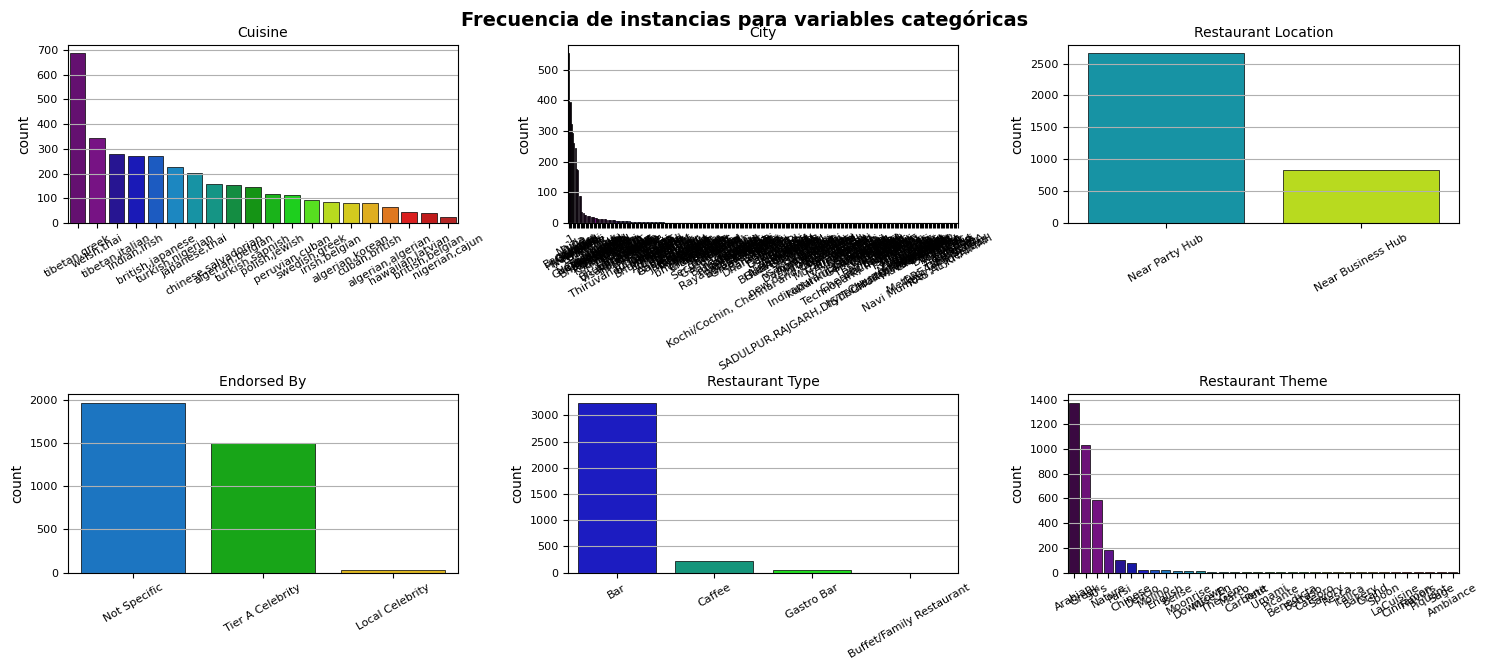

In [25]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, df_imputado , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [26]:
# Distribución de cada variable categórica en el conjunto de datos
for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(df_imputado[col].value_counts())
    print()

===== Cuisine ====================
Cuisine
tibetan,greek          686
welsh,thai             345
tibetan,italian        278
indian,irish           273
british,japanese       271
turkish,nigerian       225
japanese,thai          204
chinese,salvadorian    159
algerian,belgian       155
turkish,sapnish        147
polish,jewish          117
peruvian,cuban         115
swedish,greek           92
irish,belgian           85
algerian,korean         83
cuban,british           81
algerian,algerian       67
hawaiian,latvian        46
british,belgian         40
nigerian,cajun          24
Name: count, dtype: int64

===== City ====================
City
Bangalore    553
-1           396
Noida        324
Hyderabad    295
Pune         262
            ... 
bihar          1
singaruli      1
KANPUR         1
Banglore       1
pondy          1
Name: count, Length: 297, dtype: int64

===== Restaurant Location ====================
Restaurant Location
Near Party Hub       2658
Near Business Hub     835
Name: c

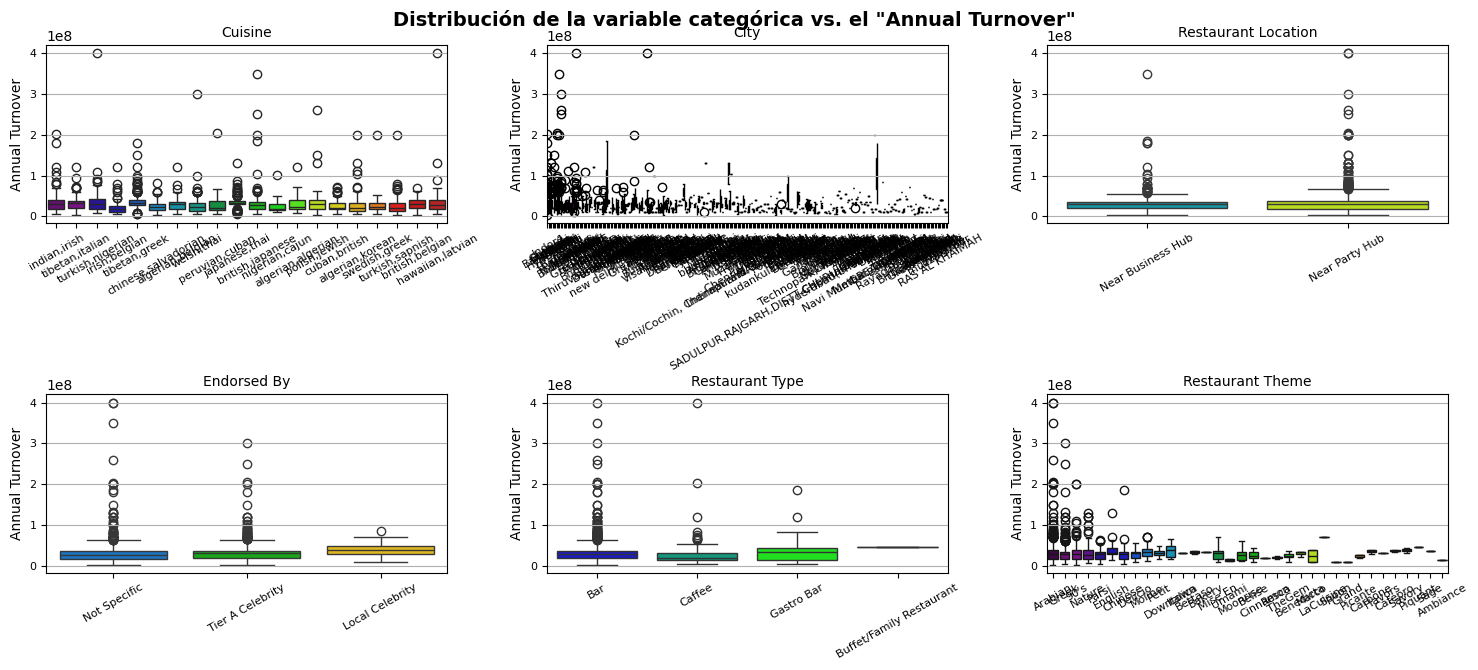

In [27]:
multiple_plot(3, df_imputado , catCols, 'Annual Turnover', 'boxplot', 'Distribución de la variable categórica vs. el "Annual Turnover"',30)

##### Analisis
- Se Identifica que las columnas 'Cuisine', 'City', 'Restaurant Theme': agregan ruido al analisis por tener catergorias poco claras, ambiguas, subjetivas y de muchas categorias unicas.  se recomienda descartarlas.
- En 'Restaurant Location', 'Endorsed By', 'Restaurant Type' se puede evidenciar un desbalanceo en la distribución cada atributo, lo que podria llevar a realizar una recategorización de los valores o descartarlas como entrada para los modelos.
- Se evidencia outliers en todas las variables, lo cual indica que hay que hacer un tratamientos en estas variables.

#### 3.1.2 Variable Datetime

<Axes: xlabel='year'>

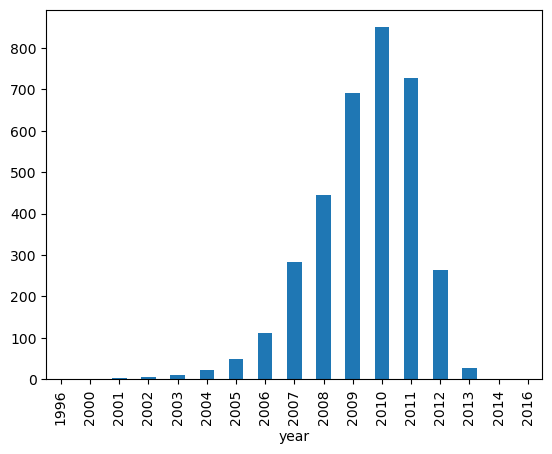

In [28]:
#Agrupar por año de apertura del restaurante
df_imputado['year'] = df_imputado['Opening Day'].dt.year
df_imputado['year'].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='mes'>

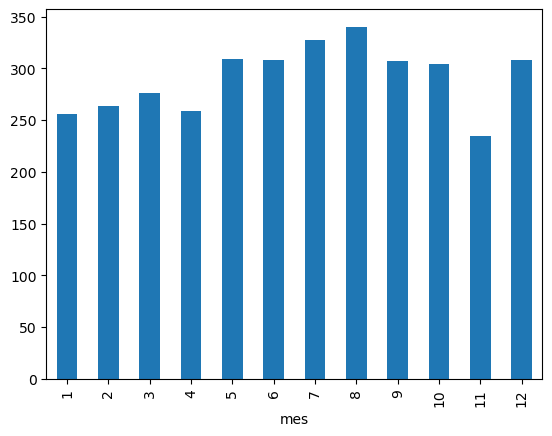

In [29]:
#Agrupar por Mes de apertura del restaurante
df_imputado['mes'] = df_imputado['Opening Day'].dt.month
df_imputado['mes'].value_counts().sort_index().plot(kind='bar')


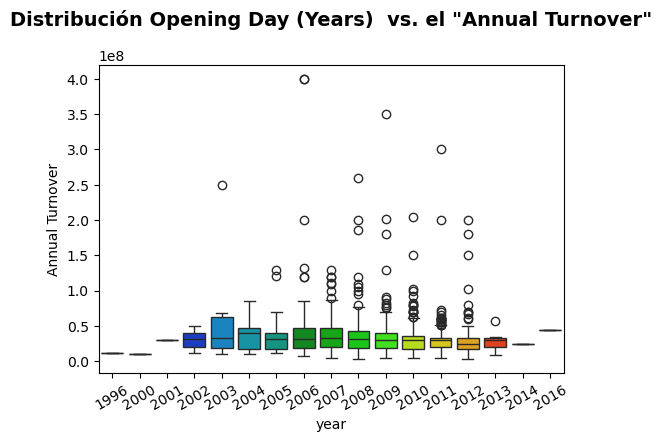

In [30]:
multiple_plot(1, df_imputado , 'year', 'Annual Turnover', 'boxplot', 'Distribución Opening Day (Years)  vs. el "Annual Turnover"',30)

##### Analisis
- El año con mayor cantidad de apertura de restaurantes fue en el 2010
- El año con mayor mediana de ingresos fue el 2004, pero en general hay una tendencia homogenea (en cuanto a la mediana)
- Los años con cajas más largas (2004,2006,2007) indican que tuvieron mayor ingresos por dispersión.

#### 3.1.3 Variables Númericas

In [31]:
#Lista de variables numéricas
numCols = vnumList(df_imputado)
df_imputado[numCols].head(2)

,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy,year,mes
0,42000000.0,84.3,95.8,1,1,1,0,1,2,3,...,5,7,10,8,8,6,6,6,2009,2
1,50000000.0,85.4,85.0,1,1,1,1,0,2,3,...,7,8,9,5,7,7,3,8,2008,9


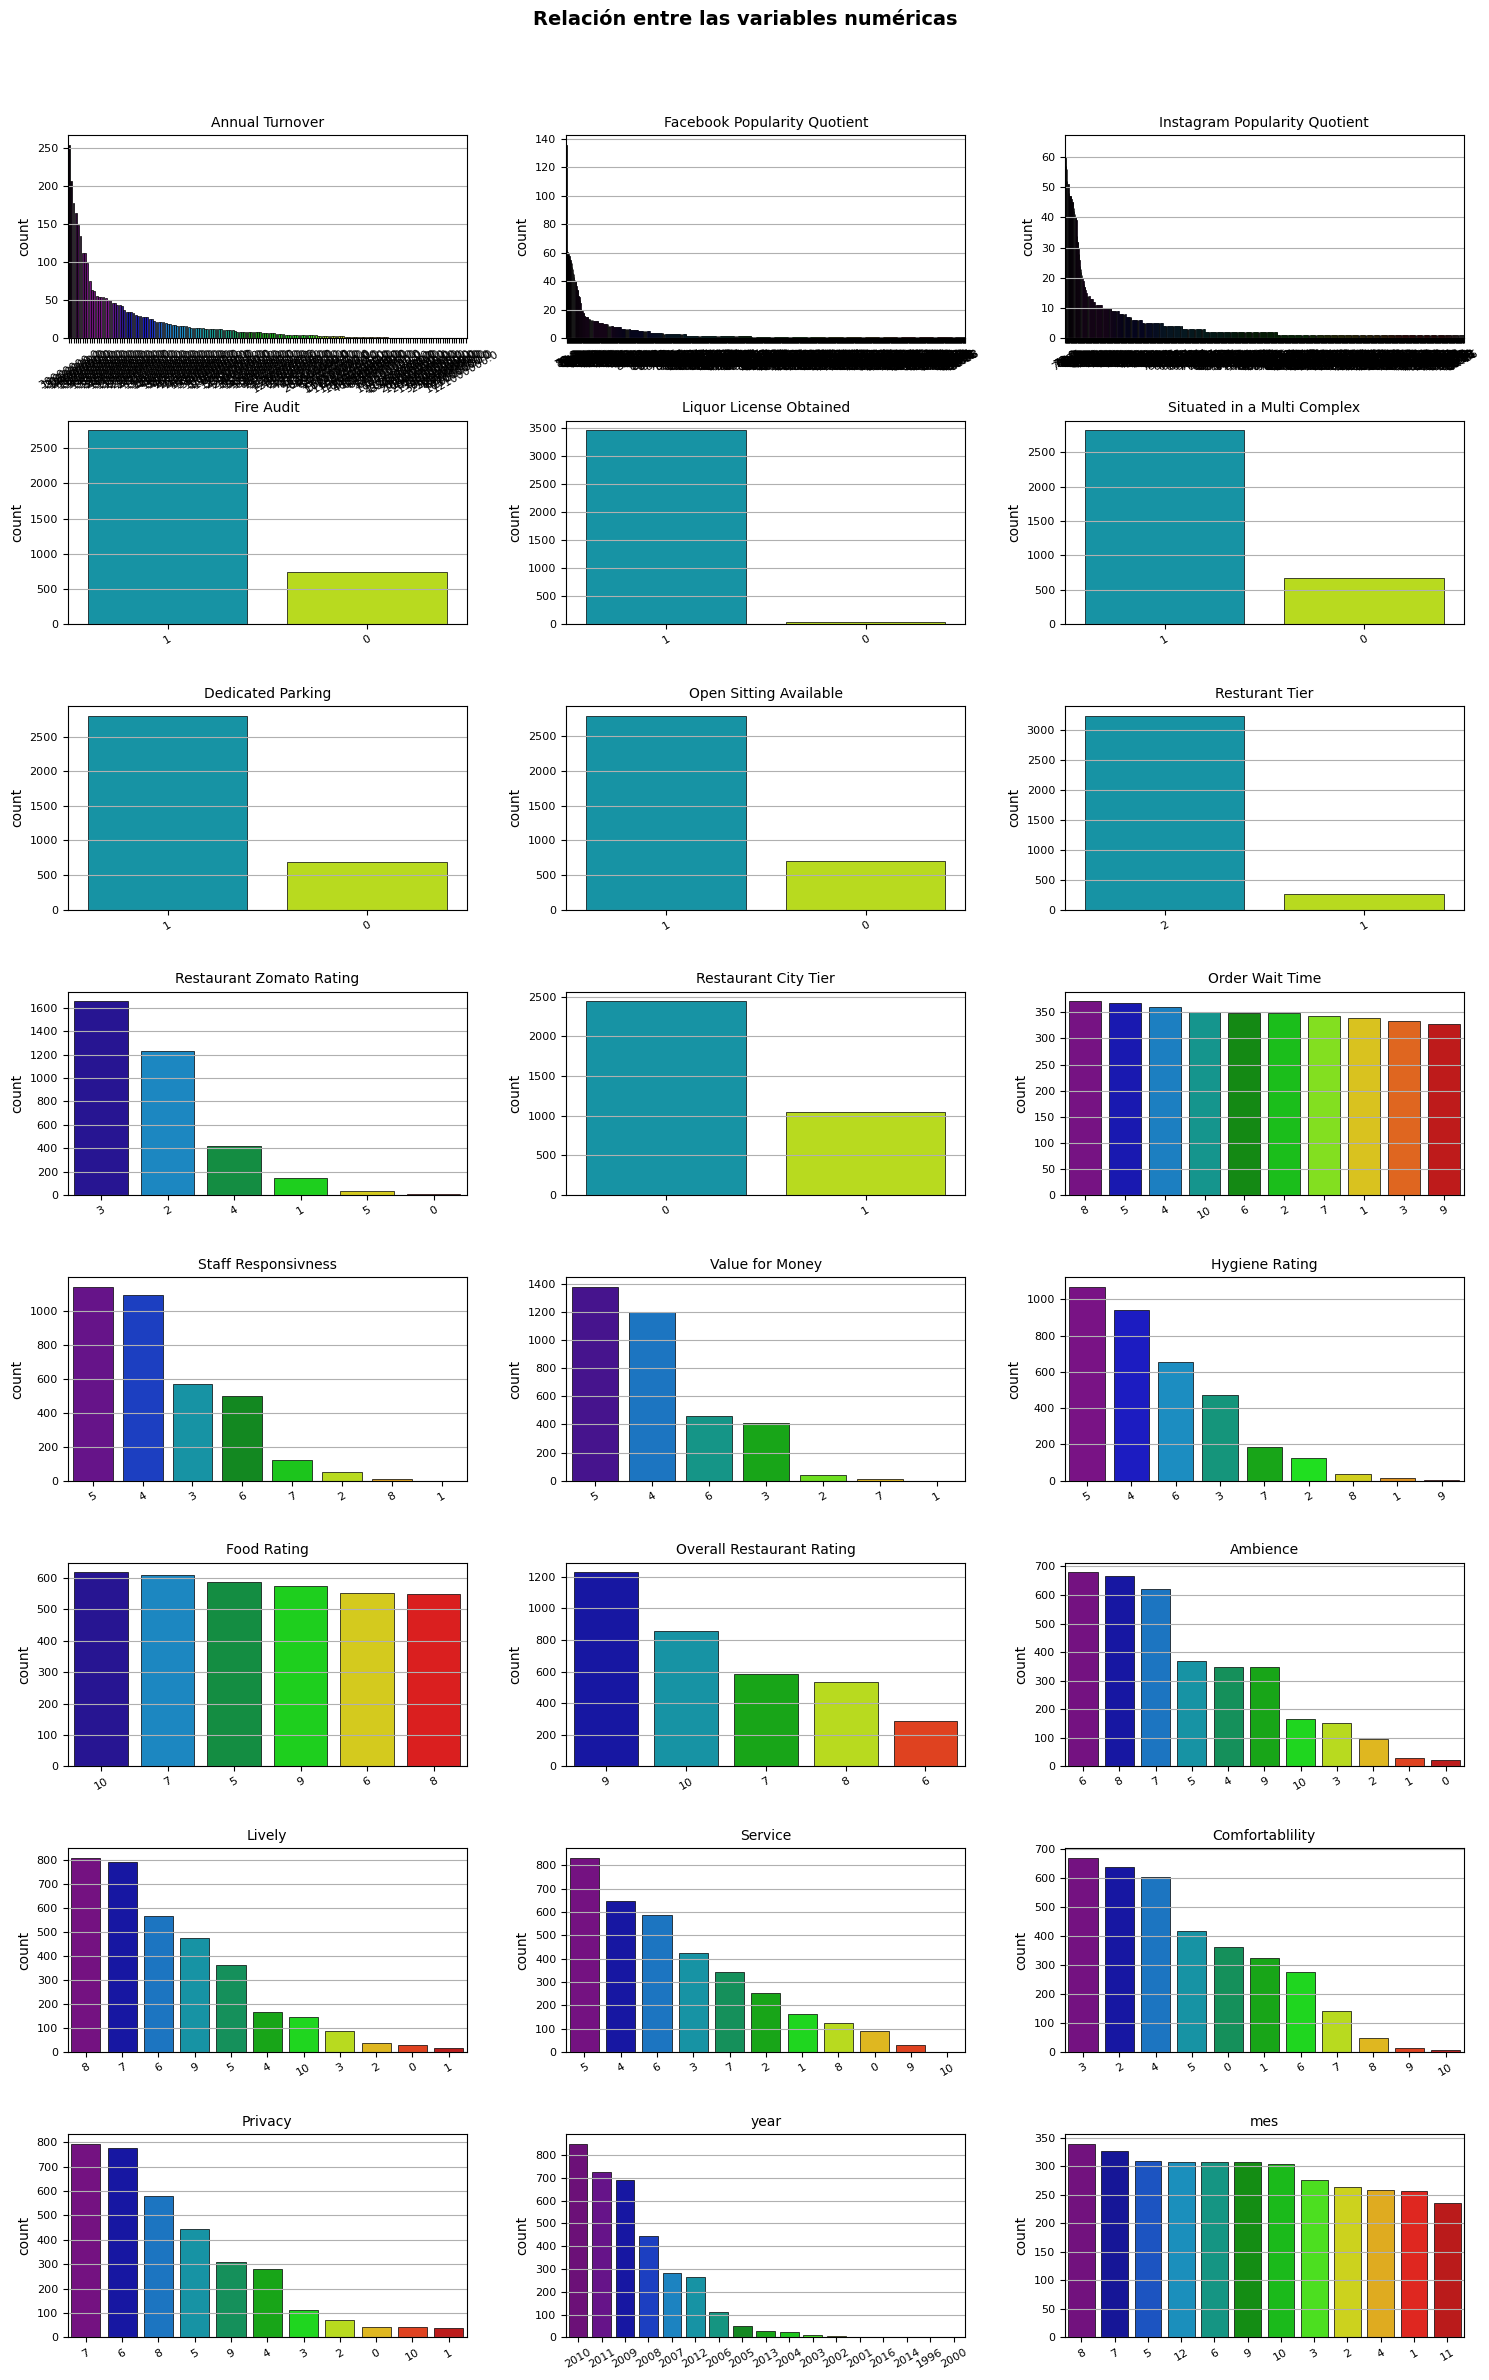

In [32]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(3, df_imputado , numCols, 'Annual Turnover', 'countplot', 'Relación entre las variables numéricas',30)

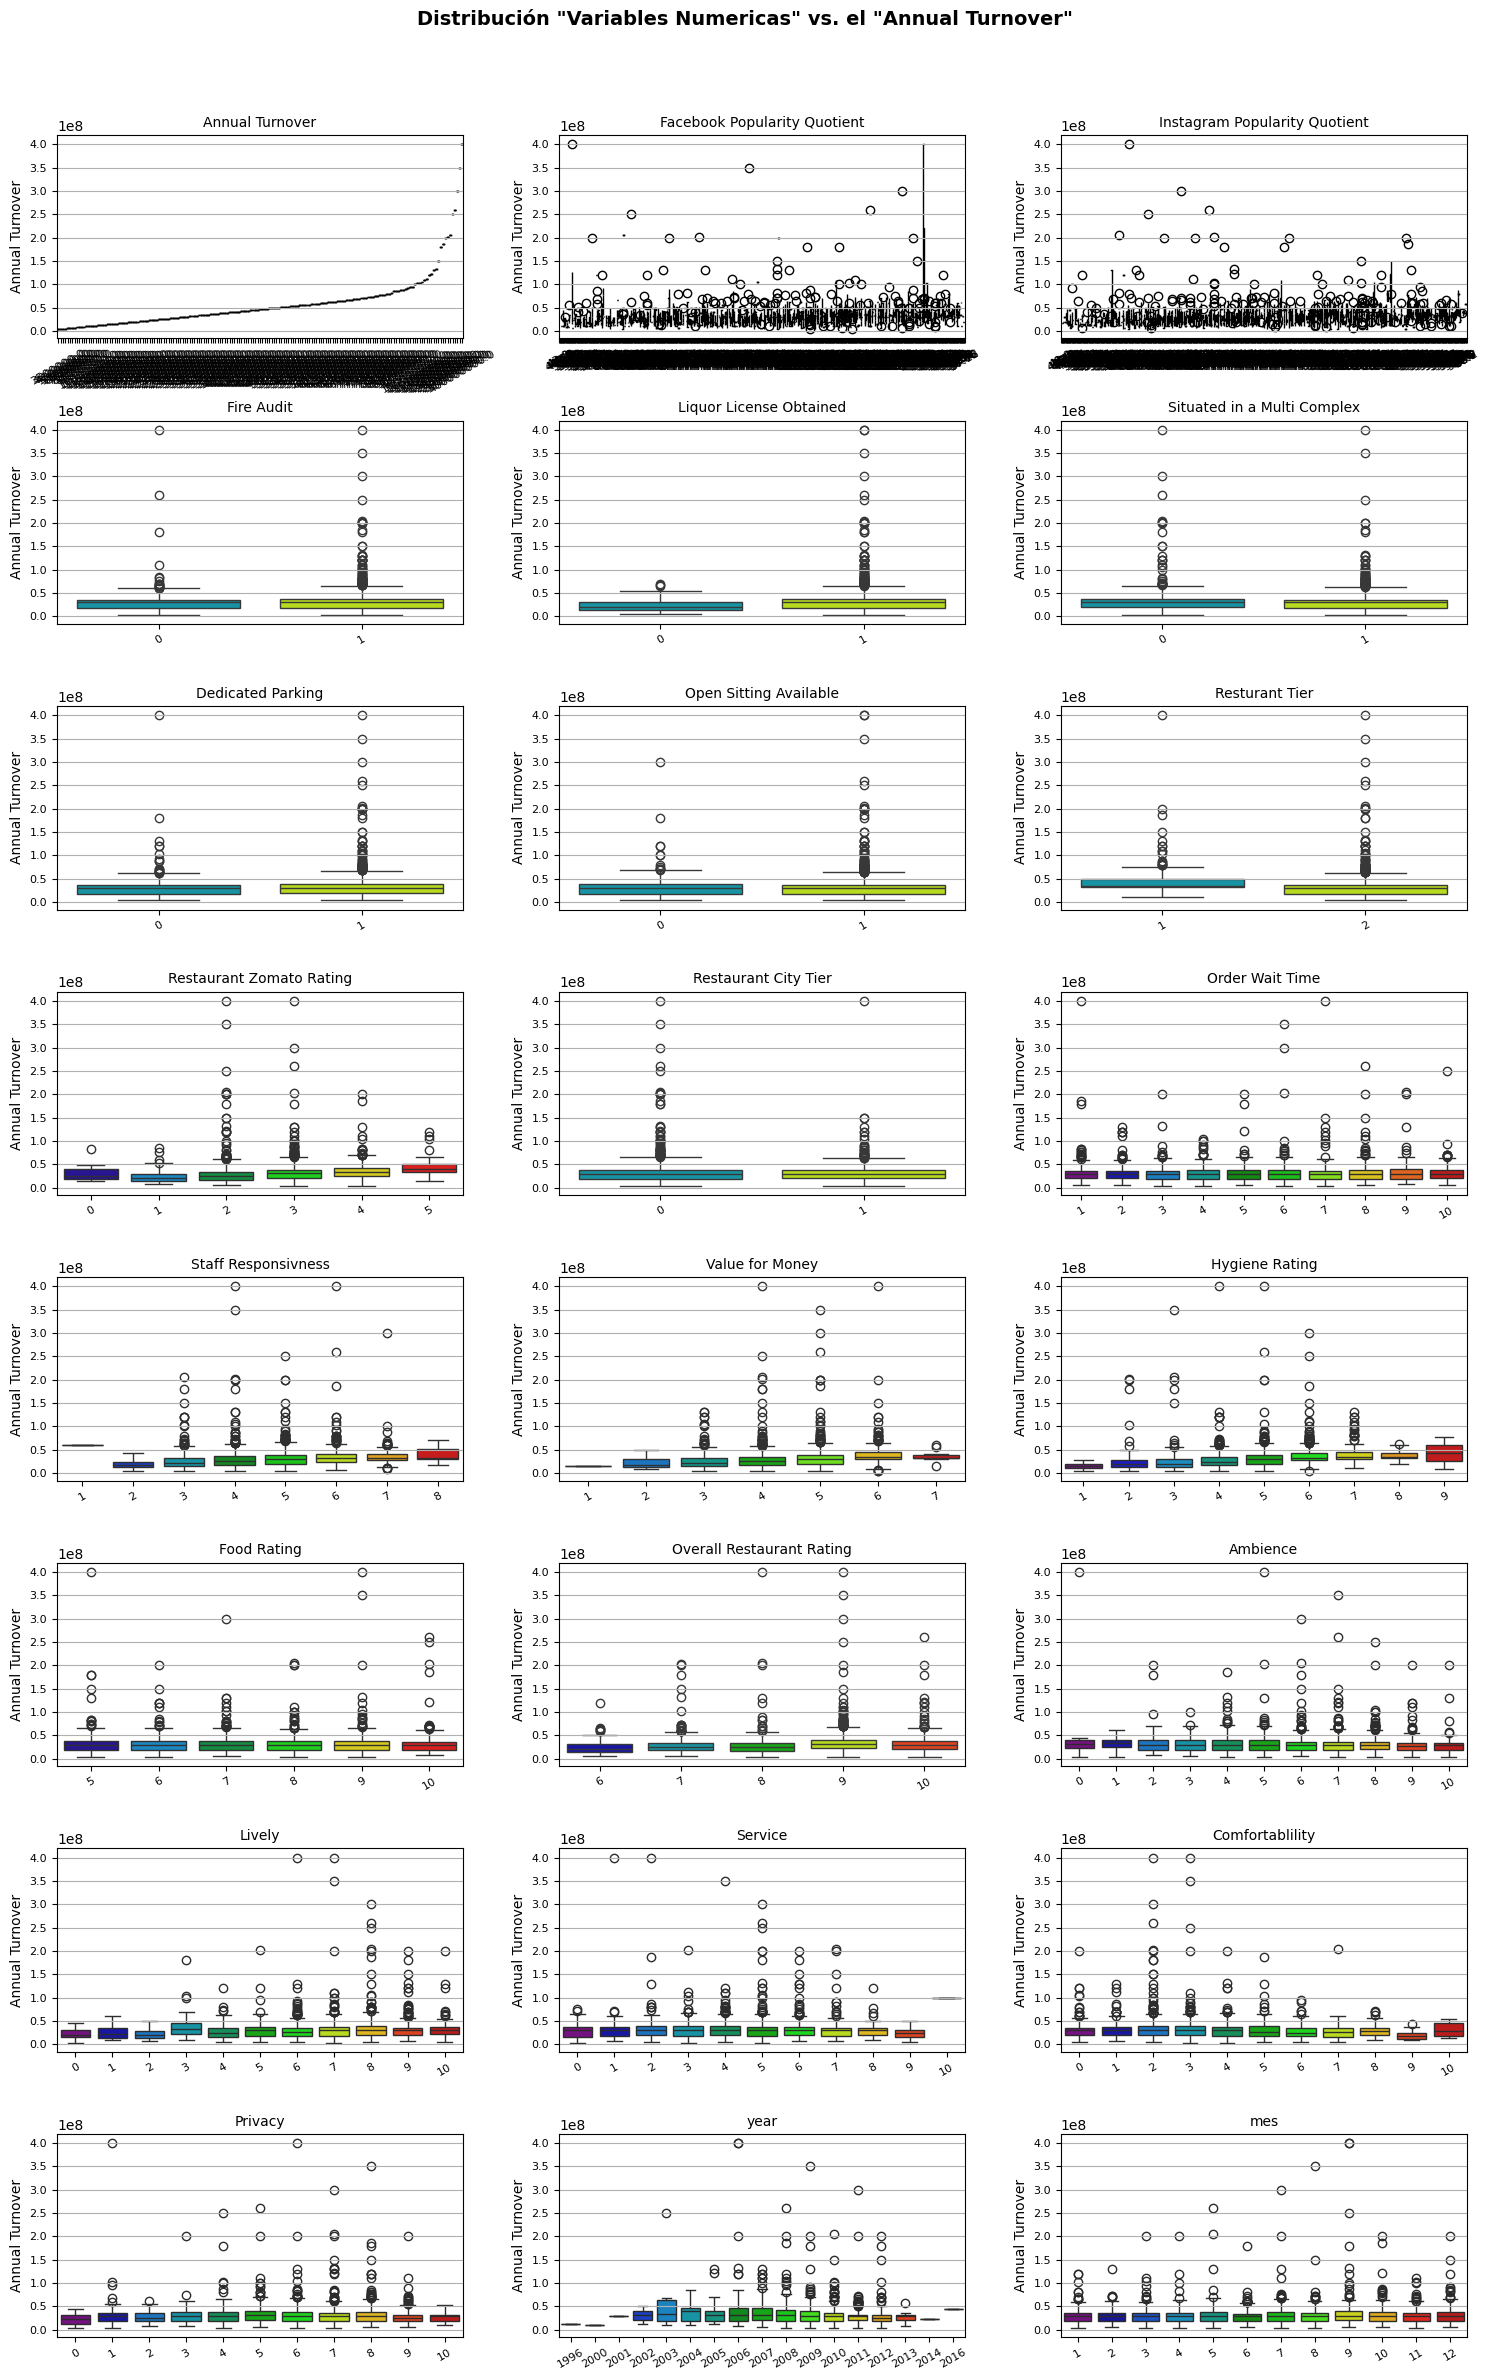

In [33]:
multiple_plot(3, df_imputado , numCols, 'Annual Turnover', 'boxplot', 'Distribución "Variables Numericas" vs. el "Annual Turnover"',30)

##### Analisis
- No hay una variable que graficamente interprete directa o indirectamente la variable objetivo con los datos de entrada vs salida.
- Se tiene muchos valores outliers lo que contamina el analisis y a futuro los modelos de regresión a implementar.



### 3.2 Variable de salida

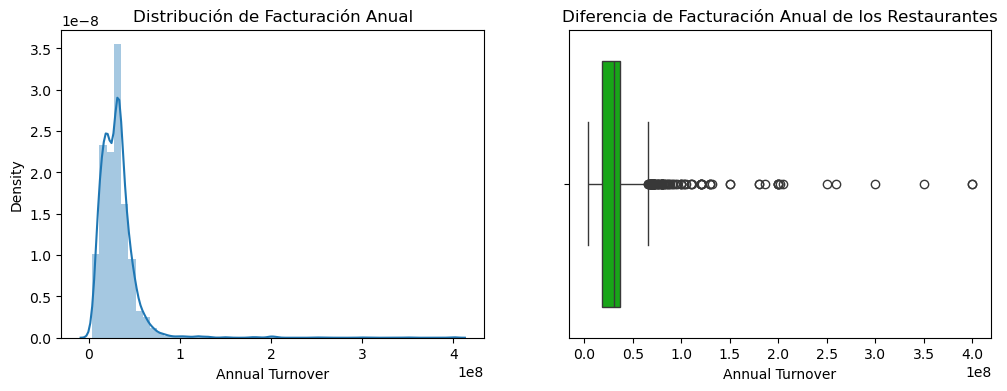

In [34]:
#Histográma y caja de bigotes de la facturacion anual
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de Facturación Anual')
sns.distplot(df_imputado['Annual Turnover'])

plt.subplot(1,2,2)
plt.title('Diferencia de Facturación Anual de los Restaurantes')
sns.boxplot(x=df_imputado['Annual Turnover'], palette='nipy_spectral')

plt.show()

In [35]:
#Descripción facturación anual de restaurantes: Total, media, desviación, mínimo, máximo y percentiles 

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(df_imputado['Annual Turnover'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count        3493
mean     30725709
std      21651247
min       3500000
25%      18000000
50%      30000000
75%      37000000
85%      43000000
90%      48000000
95%      57000000
97.5%    68000000
100%    400000000
max     400000000
Name: Annual Turnover, dtype: float64


##### Analisis
- La densidad de la variable objetivo esta en los primeros 100 millones de facturación anual.
- Hay que identificar y eliminar los valores atipicos de la variable de salida.

## 4. Preparacion de Datos

### 4.1 Valores atípicos 


#### Variables de entrada

In [36]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada

#Lista de variables numéricas
numCols = vnumList(df_imputado)

# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof 
x_pred = lof.fit_predict(df_imputado[numCols])

# Identificar los índices de los valores atípicos
outliers = x_pred == -1

print('Indices de valores atípicos: ', df_imputado[outliers].index.tolist())

Indices de valores atípicos:  [12, 25, 36, 38, 43, 49, 59, 66, 92, 108, 121, 128, 144, 146, 166, 167, 170, 171, 198, 202, 245, 247, 257, 262, 270, 277, 301, 303, 325, 335, 365, 368, 370, 399, 409, 420, 430, 432, 442, 444, 466, 477, 488, 489, 490, 491, 493, 498, 500, 501, 510, 520, 523, 540, 541, 542, 558, 564, 601, 613, 620, 628, 639, 664, 674, 683, 710, 721, 742, 749, 754, 755, 757, 770, 779, 794, 804, 812, 823, 833, 846, 849, 856, 871, 877, 881, 897, 898, 919, 922, 929, 939, 951, 961, 981, 985, 989, 993, 997, 1000, 1019, 1054, 1057, 1064, 1083, 1097, 1102, 1110, 1111, 1135, 1137, 1150, 1153, 1157, 1161, 1169, 1174, 1194, 1219, 1235, 1237, 1239, 1242, 1243, 1288, 1315, 1319, 1325, 1333, 1334, 1337, 1353, 1367, 1370, 1373, 1375, 1393, 1395, 1402, 1411, 1417, 1420, 1446, 1452, 1459, 1469, 1472, 1488, 1497, 1517, 1540, 1541, 1542, 1547, 1554, 1558, 1571, 1577, 1578, 1586, 1599, 1608, 1661, 1665, 1707, 1716, 1734, 1737, 1756, 1758, 1759, 1764, 1780, 1786, 1813, 1821, 1823, 1828, 1830, 185

  File "\\?\C:\Users\Usuario\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [37]:
# Eliminar los valores atípicos del dataframe original
df_imputado2 = df_imputado.loc[~outliers]

In [38]:
df_imputado2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3143 entries, 0 to 3492
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Annual Turnover                3143 non-null   float64       
 1   Cuisine                        3143 non-null   object        
 2   City                           3143 non-null   object        
 3   Restaurant Location            3143 non-null   object        
 4   Facebook Popularity Quotient   3143 non-null   float64       
 5   Endorsed By                    3143 non-null   object        
 6   Instagram Popularity Quotient  3143 non-null   float64       
 7   Fire Audit                     3143 non-null   int64         
 8   Liquor License Obtained        3143 non-null   int64         
 9   Situated in a Multi Complex    3143 non-null   int64         
 10  Dedicated Parking              3143 non-null   int64         
 11  Open Sitting Available

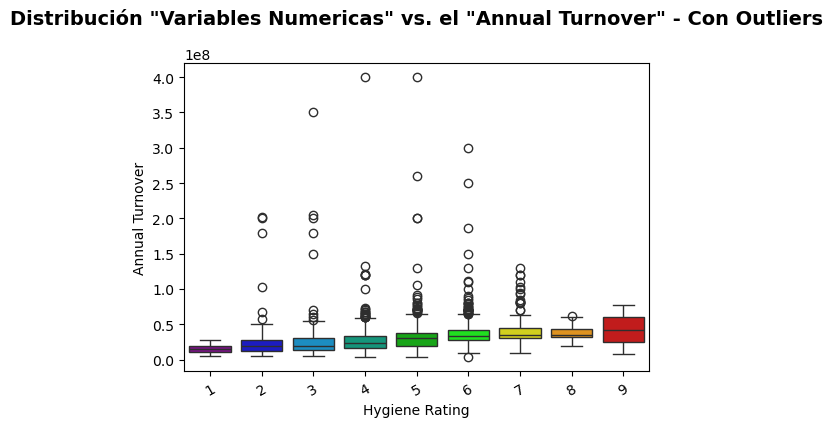

In [39]:
multiple_plot(1, df_imputado , 'Hygiene Rating', 'Annual Turnover', 'boxplot', 'Distribución "Variables Numericas" vs. el "Annual Turnover" - Con Outliers',30)

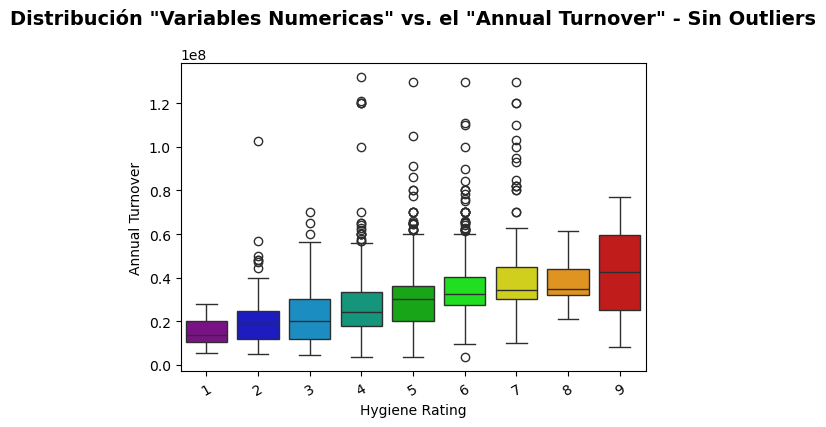

In [40]:
multiple_plot(1, df_imputado2 , 'Hygiene Rating', 'Annual Turnover', 'boxplot', 'Distribución "Variables Numericas" vs. el "Annual Turnover" - Sin Outliers',30)

#### Variable de salida

In [41]:
#Calculo de valores atípicos

#Calculo de Q1 t Q3
Q1 = np.percentile(df_imputado2['Annual Turnover'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df_imputado2['Annual Turnover'], 75, interpolation = 'midpoint') 
  
#Cálculo del rango intercuartil    
IQR = Q3 - Q1 

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR
   
print(f'Valor atípico leve inferior:{VAInf}') 
print(f'Valor atípico leve superior:{VASup}') 


Valor atípico leve inferior:-9000000.0
Valor atípico leve superior:63000000.0


In [42]:
# Se eliminan los valores atípicos
df_sin_atipicos = df_imputado2
df_sin_atipicos = df_sin_atipicos.drop(df_sin_atipicos[df_sin_atipicos['Annual Turnover']>VASup].index)

#Reiniciar el indice
df_sin_atipicos.reset_index(drop=True, inplace=True) 

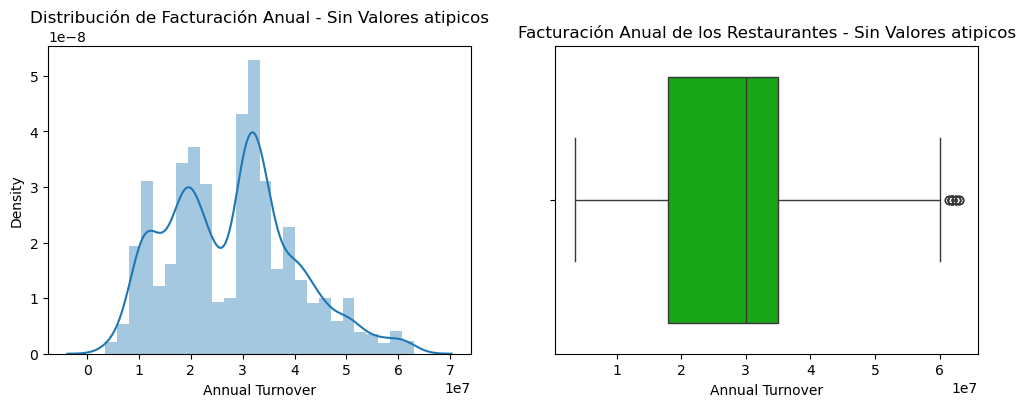

In [43]:
#Histográma y caja de bigotes de la facturacion anual

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de Facturación Anual - Sin Valores atipicos')
sns.distplot(df_sin_atipicos['Annual Turnover'])

plt.subplot(1,2,2)
plt.title('Facturación Anual de los Restaurantes - Sin Valores atipicos')
sns.boxplot(x=df_sin_atipicos['Annual Turnover'], palette='nipy_spectral')

plt.show()

In [44]:
#Descripción de la facturacion anual después de eliminar valores atípicos
#Descripción
print(df_sin_atipicos['Annual Turnover'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count       3071
mean    27983067
std     12146729
min      3500000
25%     18000000
50%     30000000
75%     35000000
85%     40000000
90%     44000000
95%     50000000
97.5%   55000000
100%    63000000
max     63000000
Name: Annual Turnover, dtype: float64


Analisis:

- Al realizar la estimacion de valores atipicos con la estimacion: Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

Donde es el rango intercuartil: IQR = Q3 - Q1, se evidencia en una distribución más homogenea de los datos y de esta forma se puede enfocar el analisis y estimación en este reango de ingresos anuales, dado que se presentaban muchos valores atipicos.

- Se logra evidenciar un cambio significado en los valores atipicos tanto de las variables de entrada como de salida.

### 4.3 Correlacion de datos

In [45]:
#Lista de variables numéricas
numCols = vnumList(df_sin_atipicos)

matrizCorr = df_sin_atipicos[['Annual Turnover']+numCols].corr()

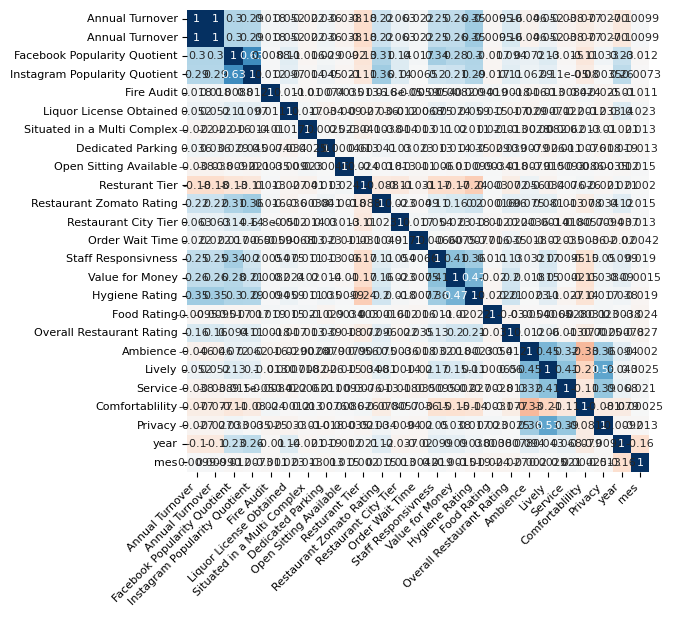

In [46]:
# Mapa de calor (Heatmap) de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)


ax.tick_params(labelsize = 8)


In [47]:
#Matriz de correlación ordenada

pd.set_option('display.float_format', lambda x: '%.4f' % x)

#Creación de la matriz
df_corr= tidy_corr_matrix(matrizCorr)

#Selección de las variables correlacionadas con el precio
df_filtrado = df_corr.loc[df_corr['variable_2'] == 'Annual Turnover']

#Se identifican las correlaciones más fuertes
df_filtrado[df_filtrado['abs_r']>=0.15] 

,variable_1,variable_2,r,abs_r
376,Hygiene Rating,Annual Turnover,0.3517,0.3517
375,Hygiene Rating,Annual Turnover,0.3517,0.3517
51,Facebook Popularity Quotient,Annual Turnover,0.3006,0.3006
50,Facebook Popularity Quotient,Annual Turnover,0.3006,0.3006
76,Instagram Popularity Quotient,Annual Turnover,0.2911,0.2911
75,Instagram Popularity Quotient,Annual Turnover,0.2911,0.2911
350,Value for Money,Annual Turnover,0.2560,0.2560
351,Value for Money,Annual Turnover,0.2560,0.2560
325,Staff Responsivness,Annual Turnover,0.2473,0.2473
326,Staff Responsivness,Annual Turnover,0.2473,0.2473


In [48]:
#Cantidad de variables más relevantes extraidas a partir de la matriz de correlación ordenada
VarRelevantes = df_filtrado[df_filtrado['abs_r']>=0.15].shape[0]

#Creacion de la lista de variables más relevantes
vDep =df_filtrado['variable_1'][:VarRelevantes].tolist()
print(vDep)

['Hygiene Rating', 'Hygiene Rating', 'Facebook Popularity Quotient', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Instagram Popularity Quotient', 'Value for Money', 'Value for Money', 'Staff Responsivness', 'Staff Responsivness', 'Restaurant Zomato Rating', 'Restaurant Zomato Rating', 'Resturant Tier', 'Resturant Tier', 'Overall Restaurant Rating', 'Overall Restaurant Rating']


<Axes: >

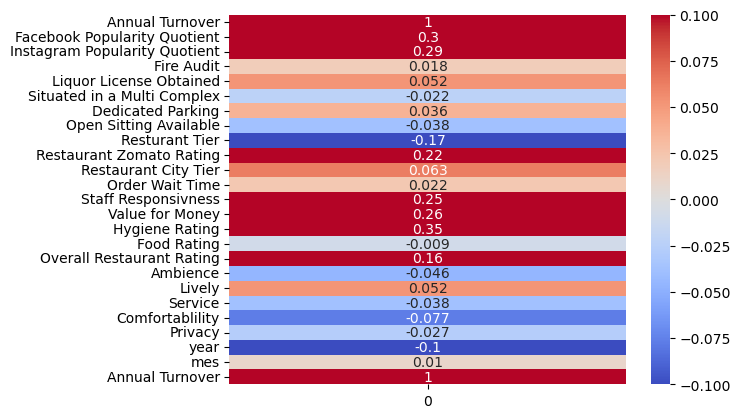

In [49]:
corr_series = df_sin_atipicos[numCols + ['Annual Turnover']].corrwith(df_sin_atipicos['Annual Turnover'])
sns.heatmap(
    corr_series.to_frame().round(3),
    annot=True, cmap='coolwarm', center=0, vmin=-0.1, vmax=0.1
)

Analisis:
- Se obtiene una cantidad de 8 variables numericas que estan por encima de una correlacion de |0.15|
- Se evidencio una mejora en la correlación posterior a la eliminacion de valores atipicos de la variable objetivo.

### 4.2 Creación de Variables Dummies

In [50]:
#Borrando columnas por falta de valores, de tipo categoricas (analisis realizado en la visualizacion de estos datos)
df_sin_atipicos.drop(['Cuisine', 'City', 'Restaurant Theme'], axis='columns', inplace=True)

In [51]:
#Lista de variables categóricas
catCols = vcatList(df_sin_atipicos)
catCols

['Restaurant Location', 'Endorsed By', 'Restaurant Type']

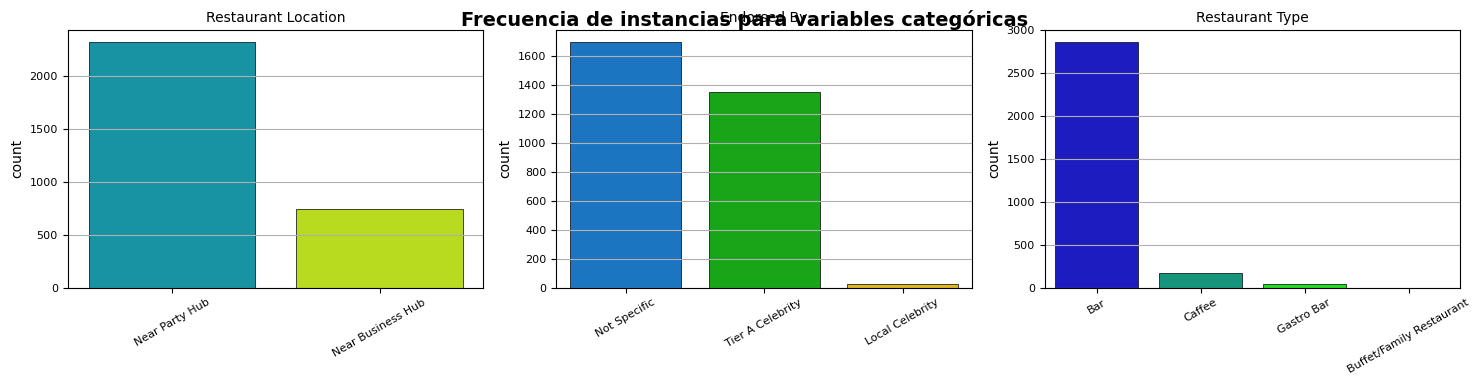

In [52]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, df_sin_atipicos , catCols, 'Annual Turnover', 'countplot', 'Frecuencia de instancias para variables categóricas',30)

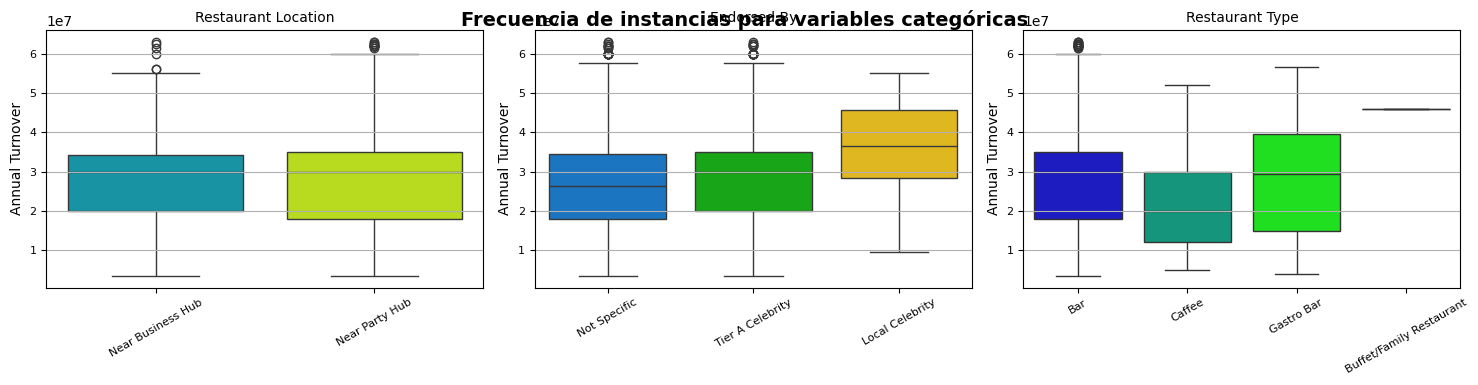

In [53]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, df_sin_atipicos , catCols, 'Annual Turnover', 'boxplot', 'Frecuencia de instancias para variables categóricas',30)

In [54]:
# Aplicación de la función de get_dummies
df_sin_atipicos2 =pd.get_dummies(df_sin_atipicos, drop_first=1)

In [55]:
#Lista de variables categóricas
catCols = vcatList(df_sin_atipicos2)
catCols

['Restaurant Location_Near Party Hub',
 'Endorsed By_Not Specific',
 'Endorsed By_Tier A Celebrity',
 'Restaurant Type_Buffet/Family Restaurant',
 'Restaurant Type_Caffee',
 'Restaurant Type_Gastro Bar']

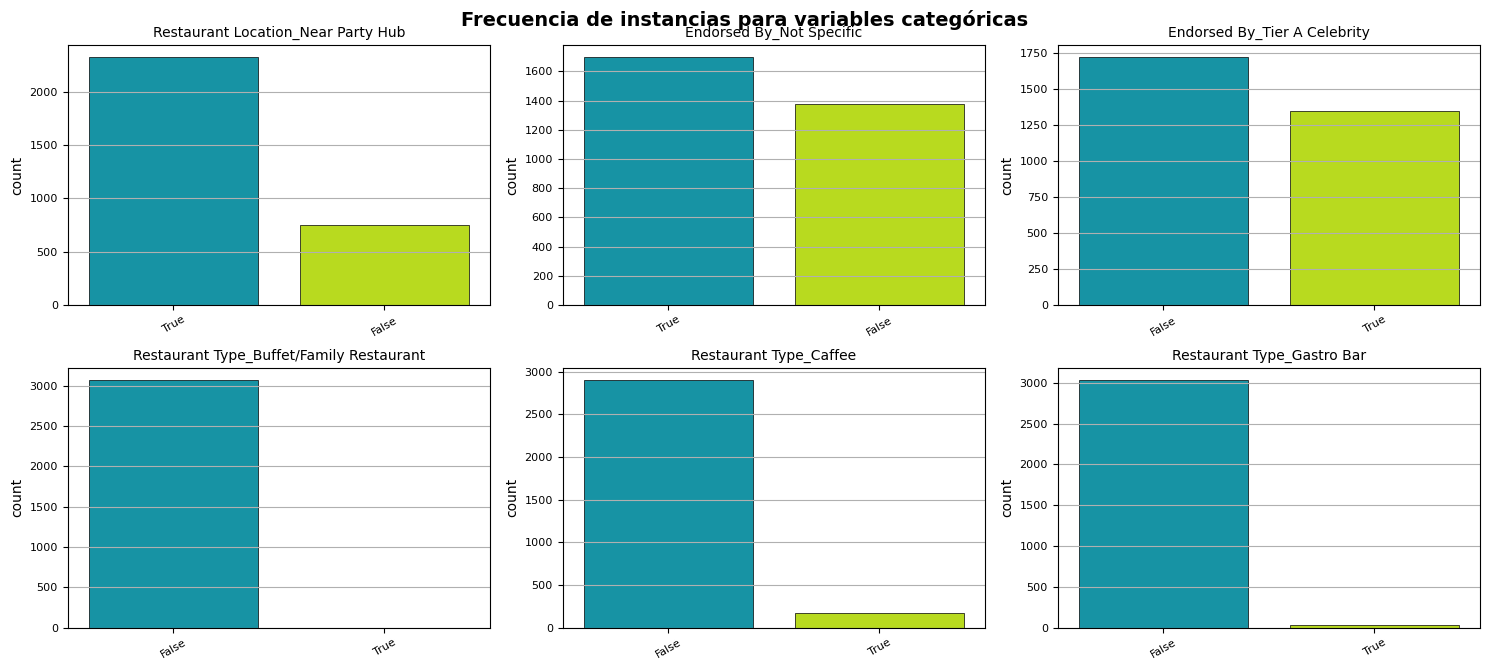

In [56]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, df_sin_atipicos2 , catCols, 'Annual Turnover', 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [57]:
#se convierte a variable tipo int
df_sin_atipicos2['Endorsed By_Not Specific'] = df_sin_atipicos2['Endorsed By_Not Specific'].astype('int64')
df_sin_atipicos2['Endorsed By_Tier A Celebrity'] = df_sin_atipicos2['Endorsed By_Tier A Celebrity'].astype('int64')
df_sin_atipicos2['Restaurant Type_Buffet/Family Restaurant'] = df_sin_atipicos2['Restaurant Type_Buffet/Family Restaurant'].astype('int64')
df_sin_atipicos2['Restaurant Location_Near Party Hub'] = df_sin_atipicos2['Restaurant Location_Near Party Hub'].astype('int64')
df_sin_atipicos2['Restaurant Type_Caffee'] = df_sin_atipicos2['Restaurant Type_Caffee'].astype('int64')
df_sin_atipicos2['Restaurant Type_Gastro Bar'] = df_sin_atipicos2['Restaurant Type_Gastro Bar'].astype('int64')

In [58]:
df_sin_atipicos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Annual Turnover                           3071 non-null   float64       
 1   Facebook Popularity Quotient              3071 non-null   float64       
 2   Instagram Popularity Quotient             3071 non-null   float64       
 3   Fire Audit                                3071 non-null   int64         
 4   Liquor License Obtained                   3071 non-null   int64         
 5   Situated in a Multi Complex               3071 non-null   int64         
 6   Dedicated Parking                         3071 non-null   int64         
 7   Open Sitting Available                    3071 non-null   int64         
 8   Resturant Tier                            3071 non-null   int64         
 9   Restaurant Zomato Rating      

Analisis:
- La columna 'Restaurant Location' entre sus valores no tienen mayor diferencia, lo cual sumaria ruido a los modelos, se descartará.
- Los datos de 'Endorsed By' y 'Restaurant Type' aunque presentan una mayor diferencia en su diagrama de caja, la distribución en cantidad de registros es desbalanceada lo que generaria un sobreajuste a los modelos.
- Se realiza la dumificación de las variables categoricas para realizar un primer modelamiento con ellas, pero su desbalanceo agrega ruido a los modelos.

### 4.4 Eliminación columnas

In [59]:
#Borrando columnas por baja correlación
cols_to_keep = [
    'Annual Turnover',
    'Hygiene Rating',
    'Facebook Popularity Quotient',
    'Instagram Popularity Quotient',
    'Value for Money',
    'Staff Responsivness',
    'Restaurant Zomato Rating',
    'Resturant Tier',
    'Overall Restaurant Rating',
    'Endorsed By_Not Specific',
    'Endorsed By_Tier A Celebrity',
    'Restaurant Type_Buffet/Family Restaurant',
    'Restaurant Location_Near Party Hub',
    'Restaurant Type_Caffee',
    'Restaurant Type_Gastro Bar'
]

df_clean = df_sin_atipicos2.drop(
    columns=[col for col in df_sin_atipicos2.columns if col not in cols_to_keep]
)


In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Annual Turnover                           3071 non-null   float64
 1   Facebook Popularity Quotient              3071 non-null   float64
 2   Instagram Popularity Quotient             3071 non-null   float64
 3   Resturant Tier                            3071 non-null   int64  
 4   Restaurant Zomato Rating                  3071 non-null   int64  
 5   Staff Responsivness                       3071 non-null   int64  
 6   Value for Money                           3071 non-null   int64  
 7   Hygiene Rating                            3071 non-null   int64  
 8   Overall Restaurant Rating                 3071 non-null   int64  
 9   Restaurant Location_Near Party Hub        3071 non-null   int64  
 10  Endorsed By_Not Specific            

### 4.5 Visualización datos final

In [61]:
#Lista de variables numéricas
numCols = vnumList(df_clean)
numCols

['Annual Turnover',
 'Facebook Popularity Quotient',
 'Instagram Popularity Quotient',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Staff Responsivness',
 'Value for Money',
 'Hygiene Rating',
 'Overall Restaurant Rating',
 'Restaurant Location_Near Party Hub',
 'Endorsed By_Not Specific',
 'Endorsed By_Tier A Celebrity',
 'Restaurant Type_Buffet/Family Restaurant',
 'Restaurant Type_Caffee',
 'Restaurant Type_Gastro Bar']

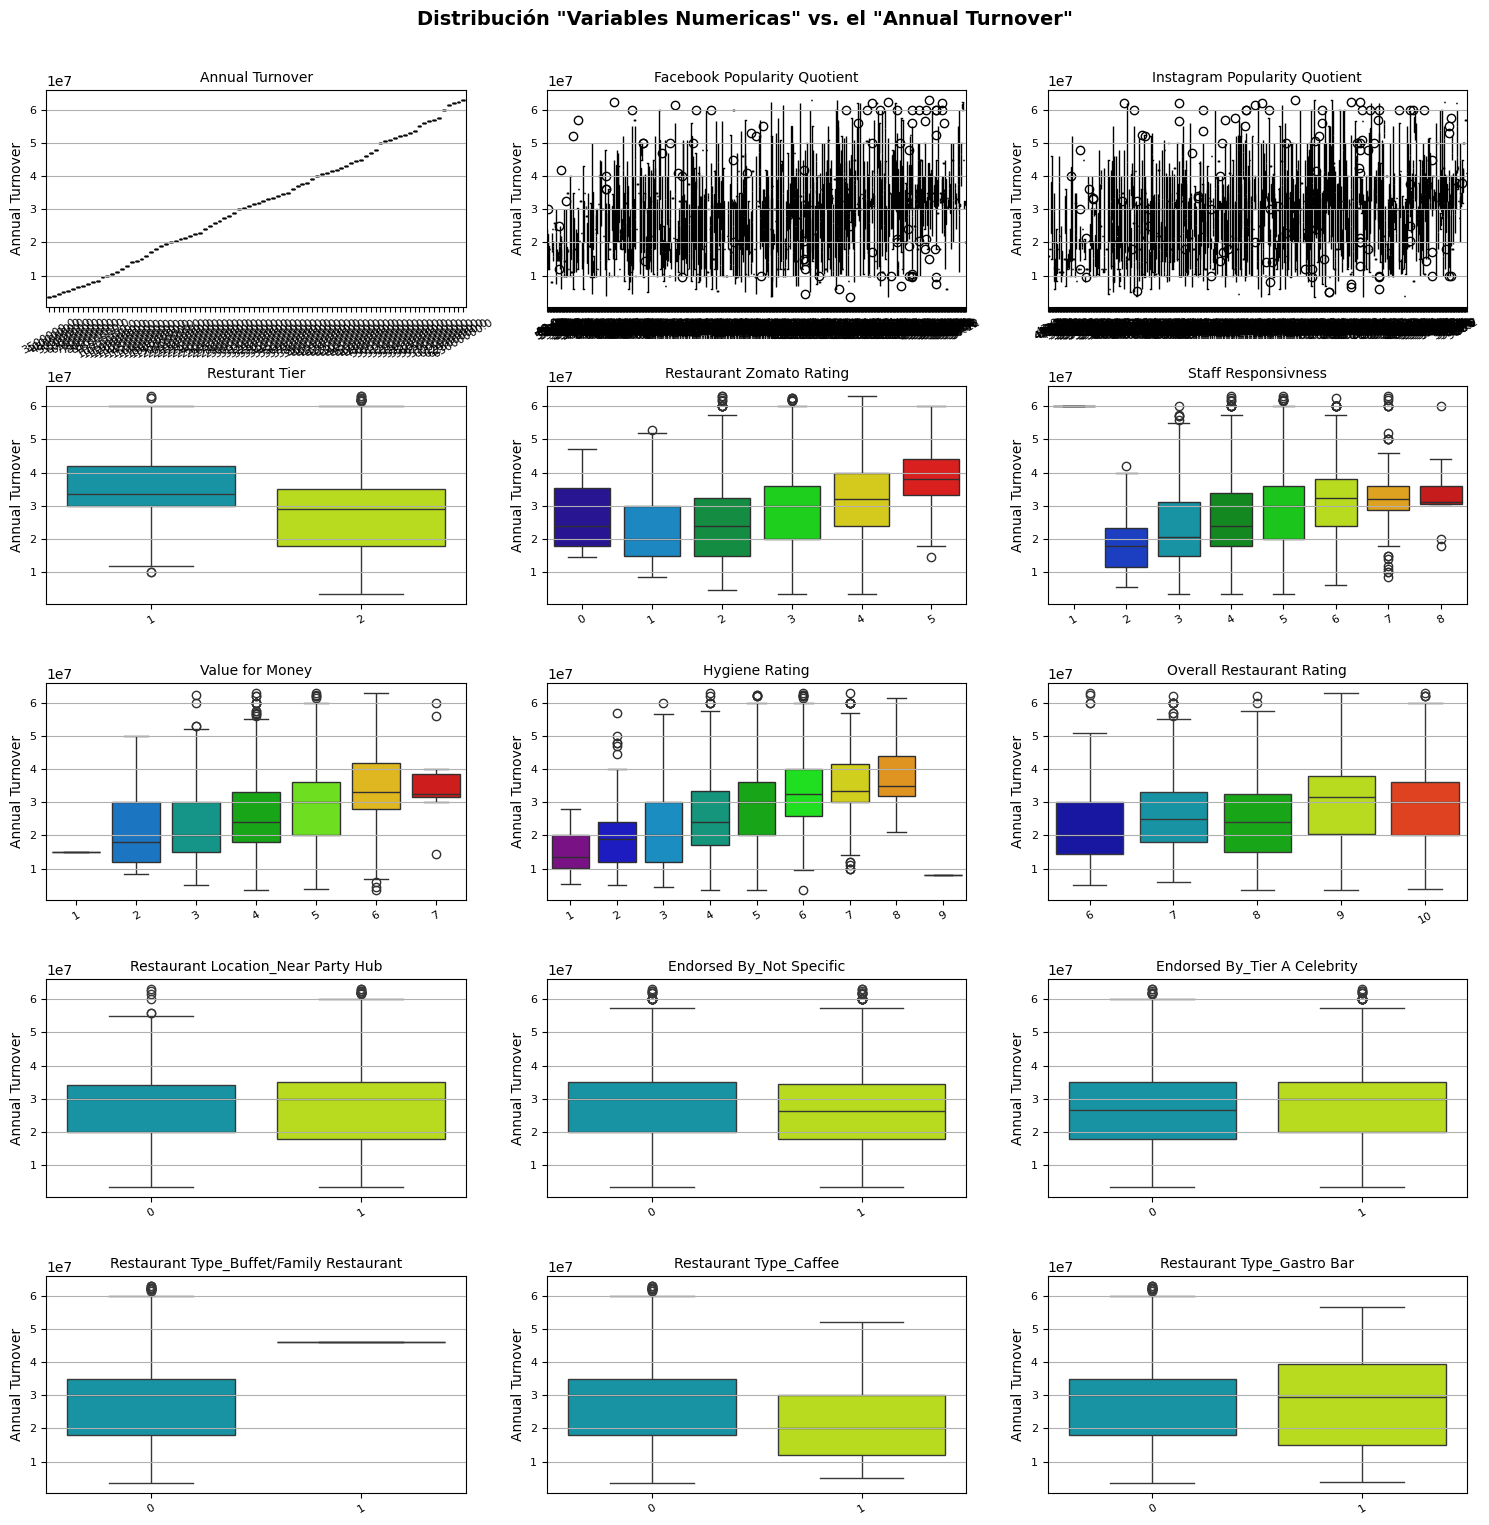

In [62]:
multiple_plot(3, df_clean , numCols, 'Annual Turnover', 'boxplot', 'Distribución "Variables Numericas" vs. el "Annual Turnover"',30)

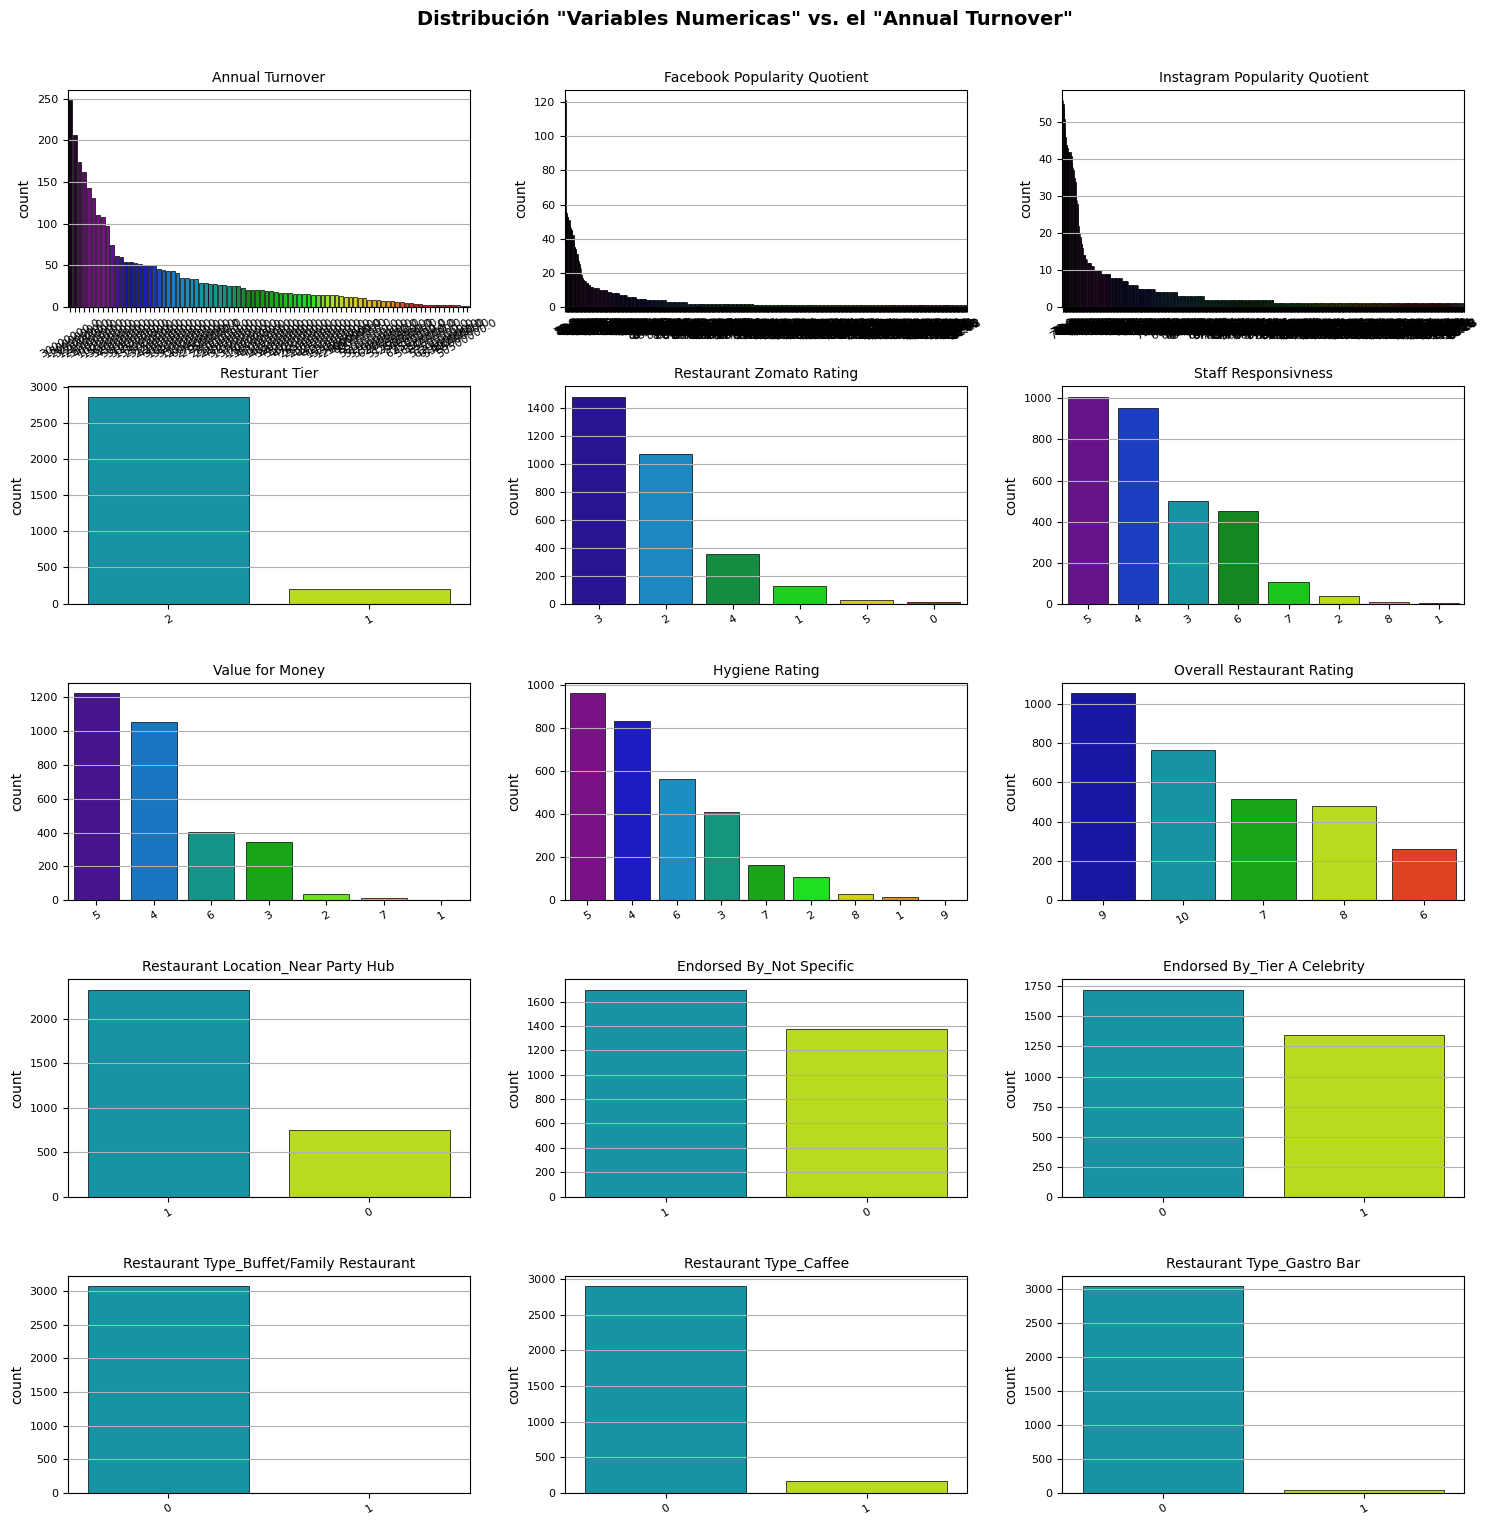

In [63]:
multiple_plot(3, df_clean , numCols, 'Annual Turnover', 'countplot', 'Distribución "Variables Numericas" vs. el "Annual Turnover"',30)

In [64]:
#exportar datos
df_clean.to_csv(f"{csv_path}/restaurants_dataset_clean.csv", index=False)

## 5. Conclusiones Análisis: y Preparación de datos

- Las columnas como Live Music Rating, Comedy Gigs Rating, Value Deals Rating y Live Sports Rating presentaban >70% de datos faltantes. Por ejemplo, Solo 205 registros (5.8%) tenían datos en Live Sports Rating y solo 205 registros (5.8%) tenían datos en Live Sports Rating. Lo que indica que estas variables representan servicios opcionales no estandarizados en restaurantes, y su inclusión distorsionaría los modelos predictivos.

- No existe correlación lineal entre facturación y calidad percibida,  esto indica que los altos ingresos no garantizan mejor experiencia, siendo la higiene el driver principal de satisfacción.

- La densidad de 'Annual Turnover' está altamente concentrada por debajo de los $100 millones, pero con muchos valores atípicos superiores. El uso de IQR para recorte reveló que estos outliers influyen significativamente en la distribución general, por lo que eliminarlos mejora la precisión de análisis posteriores y reduce ruido en correlaciones.

- Posterior al tratamiento de outliers, se identificaron 8 variables numéricas con correlaciones absolutas superiores a |0.15| frente a Annual Turnover. Esto sugiere relaciones existentes (aunque debiles) entre la facturación y otros indicadores, útiles para preselección de features en modelos predictivos.

- En general, las variables independientes muestran correlaciones débiles con Annual Turnover, lo que indica que los datos disponibles no capturan adecuadamente los factores que determinan la facturación. Esto sugiere limitaciones en el poder predictivo de los modelos y la necesidad de enriquecer los datos o mejorar su calidad para lograr un mejor desempeño.



# 1.2 Ejercicio ML - Modelos de Predicción

- Con base en lo aprendido en el análisis previo debes proponer por lo menos 3 familias/tipos de modelos distintos y debes entrenar los modelos de predicción para la columna objetivo (facturación anual "Annual Turnover").
- Debes realizar la adecuada preparación de los datos para cada tipo de modelo, lo cual puede implicar, limpieza,
remoción de outliers, y normalización según consideres apropiado (debes sustentar cada decisión).  (Ya realizado)
- Finalmente debes comparar adecuadamente los 3 modelos, realizar “hyperparameter tuning” si aplica.
- Debes elegir adecuadamente el mejor modelo según la comparación. Recuerda que debes usar métricas de evaluación adecuadas e implementar un correcto protocolo de evaluación para evitar contaminación.  


## 1. Definir las Variables para los Modelos
- Datos de Entrada ( X ) : 14
    -     'Hygiene Rating'
    -     'Facebook Popularity Quotient'
    -     'Instagram Popularity Quotient'
    -     'Value for Money'
    -     'Staff Responsivness'
    -     'Restaurant Zomato Rating'
    -     'Resturant Tier'
    -     'Overall Restaurant Rating'
    -     'Endorsed By_Not Specific'
    -     'Endorsed By_Tier A Celebrity'
    -     'Restaurant Type_Buffet/Family Restaurant'
    -     'Restaurant Location_Near Party Hub'
    -     'Restaurant Type_Caffee'
    -     'Restaurant Type_Gastro Bar'

- Datos de Salida  ( y ) : 1
    - 'Annual Turnover'

In [65]:
df_ml = df_clean

In [66]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Annual Turnover                           3071 non-null   float64
 1   Facebook Popularity Quotient              3071 non-null   float64
 2   Instagram Popularity Quotient             3071 non-null   float64
 3   Resturant Tier                            3071 non-null   int64  
 4   Restaurant Zomato Rating                  3071 non-null   int64  
 5   Staff Responsivness                       3071 non-null   int64  
 6   Value for Money                           3071 non-null   int64  
 7   Hygiene Rating                            3071 non-null   int64  
 8   Overall Restaurant Rating                 3071 non-null   int64  
 9   Restaurant Location_Near Party Hub        3071 non-null   int64  
 10  Endorsed By_Not Specific            

## 2. Dividir el conjunto de datos

In [68]:
#Se crea una lista con todas las varibles de entrada
#X_inputList = list(df_ml.columns)
#X_inputList.remove('Annual Turnover')

#Se lista las columnas numericas
numCols = vnumList(df_ml)

#Num_vars contiene la intersección de variables de las listas numCols y vDep
#num_vars = list(set(numCols) & set(X_inputList))

#Se establece las variables de entrada 'X' y la variable de salida 'y'
#X = df_ml.drop(columns=['Annual Turnover','Endorsed By_Not Specific','Endorsed By_Tier A Celebrity','Restaurant Type_Buffet/Family Restaurant','Restaurant Location_Near Party Hub','Restaurant Type_Caffee','Restaurant Type_Gastro Bar'])
X = df_ml.drop(columns=['Annual Turnover'])
y = df_ml['Annual Turnover']  # Variable Objetivo

#X_inputList 

In [69]:
# Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y.values.reshape(-1,1),  
                                                     train_size   = 0.8,
                                                     random_state = 1234,
                                                     shuffle      = True
                                                    )

## 3. Modelamiento

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456 entries, 1940 to 2863
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Facebook Popularity Quotient              2456 non-null   float64
 1   Instagram Popularity Quotient             2456 non-null   float64
 2   Resturant Tier                            2456 non-null   int64  
 3   Restaurant Zomato Rating                  2456 non-null   int64  
 4   Staff Responsivness                       2456 non-null   int64  
 5   Value for Money                           2456 non-null   int64  
 6   Hygiene Rating                            2456 non-null   int64  
 7   Overall Restaurant Rating                 2456 non-null   int64  
 8   Restaurant Location_Near Party Hub        2456 non-null   int64  
 9   Endorsed By_Not Specific                  2456 non-null   int64  
 10  Endorsed By_Tier A Celebrity          

In [71]:
# 1. Definición de modelos y pipelines
pipelines = {
    # Modelos lineales con escalado robusto
    'Linear': Pipeline([
        ('scaler', RobustScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', Ridge(random_state=42))
    ]),
    
    'Huber': Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', HuberRegressor())
    ]),
    
    # Modelos basados en árboles (sin escalado necesario)
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),
    
    'XGBoost': Pipeline([
        #('model', GradientBoostingRegressor(random_state=42))
        ('scaler', RobustScaler()), ('model', XGBRegressor(verbosity=0))
    ]),
    
    # SVR con escalado
    'SVR': Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', SVR())
    ]),

    'GradientBoosting': Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ])
}

In [72]:
# 2. Hiperparámetros para tuning (optimizados para búsqueda eficiente)
param_grids = {
    'Linear': {},
    'GradientBoosting': {},
   
    'Ridge': {
        #'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500]
        'model__alpha': np.logspace(-3, 3, 20),  # Más valores y espaciado logarítmico
        'model__solver': ['svd', 'cholesky', 'lsqr']  # Nuevos solvers
    },
    
    'Huber': {
        'model__epsilon': [0.7, 1.1, 1.35, 1.5, 2.1],
        'model__alpha': [0.0001, 0.001, 0.01, 0.1]
    },
    
    'RandomForest': {
        #'model__n_estimators': [10, 50, 100, 200, 500],
        #'model__max_depth': [None, 10, 20, 50],
        #'model__min_samples_split': [2, 5, 10, 20]
        'model__n_estimators': [200, 500],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5],
        'model__max_features': ['sqrt', 0.8],  # Controlar sobreajuste
        'model__bootstrap': [True]  # Mejor generalización
        
    },
    
    'XGBoost': {
        'model__n_estimators': [20, 50, 100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__max_depth': [3, 5, 7, 9]
        #'model__n_estimators': [500, 1000],        # Aumentar para capturar patrones complejos
        #'model__learning_rate': [0.01, 0.05],      # Valores bajos para mejor generalización
        #'model__max_depth': [3, 5, 7],             # Profundidad moderada
        #'model__min_samples_split': [5, 10],        # Regularización para evitar sobreajuste
        #'model__min_samples_leaf': [2, 4],         # Hojas más grandes para ruido
        #'model__subsample': [0.7, 0.8],            # Muestreo aleatorio (Stochastic GB)
        #'model__max_features': [0.8, 'sqrt'],      # Reducción de características por split
        #'model__loss': ['squared_error', 'absolute_error']  # Robustez a outliers
    },
    
    'SVR': {
        #'model__C': [0.1, 1, 5, 10],
        #'model__kernel': ['linear', 'rbf'],
        #'model__epsilon': [0.01, 0.1, 0.3]
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['rbf', 'poly'],  # Agregar kernel polinomial
        'model__gamma': ['scale', 'auto'],
        'model__epsilon': [0.01, 0.1, 0.5]
    },
    
    
}

In [73]:
# Se plantea eliminar las variables independientes menos aportantes
#X_train.drop(['Endorsed By_Not Specific','Endorsed By_Tier A Celebrity','Restaurant Type_Buffet/Family Restaurant','Restaurant Location_Near Party Hub','Restaurant Type_Caffee','Restaurant Type_Gastro Bar'], axis='columns', inplace=True)
#X_test.drop(['Endorsed By_Not Specific','Endorsed By_Tier A Celebrity','Restaurant Type_Buffet/Family Restaurant','Restaurant Location_Near Party Hub','Restaurant Type_Caffee','Restaurant Type_Gastro Bar'], axis='columns', inplace=True)

In [74]:
# 1. Entrenamiento y evaluación
results = {}
best_models = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n Entrenando modelos...")
for name, pipeline in pipelines.items():
    # Configuración de búsqueda
    if name in ['RandomForest', 'XGBoost']:
        search = RandomizedSearchCV(
            pipeline, param_grids[name],
            n_iter=20, cv=kf, scoring='neg_mean_absolute_error',
            n_jobs=-1, random_state=42, return_train_score=True
        )
    else:
        search = GridSearchCV(
            pipeline, param_grids[name],
            cv=kf, scoring='neg_mean_absolute_error', 
            n_jobs=-1, return_train_score=True
        )
    
    # Entrenamiento
    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_
    
    # Predicciones
    y_train_pred = search.best_estimator_.predict(X_train)
    y_test_pred = search.best_estimator_.predict(X_test)
    
    # Métricas de entrenamiento (promedio CV)
    cv_results = search.cv_results_
    best_idx = search.best_index_
    
    # Métricas de test
    results[name] = {
        'best_params': search.best_params_,
        # Resultados de entrenamiento (validación cruzada)
        'train_mae': -cv_results['mean_train_score'][best_idx],
        'train_rmse': np.sqrt(-cv_results['mean_train_score'][best_idx]),
        'train_r2': None,  # No disponible directamente
        # Resultados de validación cruzada
        'cv_mae': -search.best_score_,
        'cv_rmse': np.sqrt(-search.best_score_),
        'cv_r2': None,
        # Resultados de test
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'test_r2': r2_score(y_test, y_test_pred),
        # Métricas adicionales en conjunto completo de entrenamiento
        'full_train_mae': mean_absolute_error(y_train, y_train_pred),
        'full_train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'full_train_r2': r2_score(y_train, y_train_pred)
    }
    
    print(f" > Modelo: [{name}] completado")
    print(f"   - Train MAE: {results[name]['full_train_mae']:.2f} | CV MAE: {results[name]['cv_mae']:.2f} | Test MAE: {results[name]['test_mae']:.2f}")



 Entrenando modelos...
 > Modelo: [Linear] completado
   - Train MAE: 8500284.83 | CV MAE: 8523265.11 | Test MAE: 8712884.39
 > Modelo: [Ridge] completado
   - Train MAE: 8500287.44 | CV MAE: 8523268.01 | Test MAE: 8712877.74
 > Modelo: [Huber] completado
   - Train MAE: 9574289.30 | CV MAE: 9648115.25 | Test MAE: 9614490.85
 > Modelo: [RandomForest] completado
   - Train MAE: 6929372.79 | CV MAE: 8616237.37 | Test MAE: 8695765.78
 > Modelo: [XGBoost] completado
   - Train MAE: 8203337.05 | CV MAE: 8617146.26 | Test MAE: 8684559.11
 > Modelo: [SVR] completado
   - Train MAE: 9921891.03 | CV MAE: 9930244.80 | Test MAE: 9823277.77
 > Modelo: [GradientBoosting] completado
   - Train MAE: 7942246.33 | CV MAE: 8670960.43 | Test MAE: 8687738.71


In [75]:
# 2. Resultados comparativos
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values('test_mae')

# Crear tabla resumen
summary_df = results_df[[
    'full_train_mae', 'cv_mae', 'test_mae',
    'full_train_rmse', 'cv_rmse', 'test_rmse',
    'full_train_r2', 'test_r2'
]]

# Renombrar columnas para claridad
summary_df.columns = [
    'MAE Train', 'MAE CV', 'MAE Test',
    'RMSE Train', 'RMSE CV', 'RMSE Test',
    'R² Train', 'R² Test'
]

print("\n" + "="*80)
print(" RESUMEN COMPARATIVO DE MODELOS")
print("="*80)
print(summary_df.sort_values('MAE Test'))



 RESUMEN COMPARATIVO DE MODELOS
                    MAE Train       MAE CV     MAE Test    RMSE Train  \
XGBoost          8203337.0501 8617146.2577 8684559.1138 10360336.5757   
GradientBoosting 7942246.3335 8670960.4277 8687738.7064 10052914.2070   
RandomForest     6929372.7866 8616237.3711 8695765.7759  8747547.9718   
Ridge            8500287.4444 8523268.0051 8712877.7418 10766352.7015   
Linear           8500284.8270 8523265.1124 8712884.3903 10766352.7012   
Huber            9574289.3006 9648115.2525 9614490.8502 11726440.5390   
SVR              9921891.0331 9930244.8005 9823277.7679 12273197.5304   

                   RMSE CV     RMSE Test  R² Train  R² Test  
XGBoost          2935.4976 11108182.2371    0.2717   0.1633  
GradientBoosting 2944.6495 11123399.6023    0.3143   0.1610  
RandomForest     2935.3428 11160680.6045    0.4808   0.1553  
Ridge            2919.4637 11153894.6520    0.2135   0.1564  
Linear           2919.4632 11153903.3499    0.2135   0.1564  
Huber     

In [76]:
# 3. Selección del mejor modelo
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

print(f"\n El Mejor modelo es: [{best_model_name}]")
print(f"- MAE Test: {results_df.loc[best_model_name]['test_mae']:.2f}")
print(f"- RMSE Test: {results_df.loc[best_model_name]['test_rmse']:.2f}")
print(f"- R² Test: {results_df.loc[best_model_name]['test_r2']:.4f}")


 El Mejor modelo es: [XGBoost]
- MAE Test: 8684559.11
- RMSE Test: 11108182.24
- R² Test: 0.1633



 Importancia de variables:
                                     Feature  Importance
6                             Hygiene Rating      0.2737
7                  Overall Restaurant Rating      0.0934
1              Instagram Popularity Quotient      0.0905
3                   Restaurant Zomato Rating      0.0864
0               Facebook Popularity Quotient      0.0850
2                             Resturant Tier      0.0807
4                        Staff Responsivness      0.0796
5                            Value for Money      0.0671
10              Endorsed By_Tier A Celebrity      0.0405
13                Restaurant Type_Gastro Bar      0.0280
9                   Endorsed By_Not Specific      0.0279
12                    Restaurant Type_Caffee      0.0256
8         Restaurant Location_Near Party Hub      0.0218
11  Restaurant Type_Buffet/Family Restaurant      0.0000


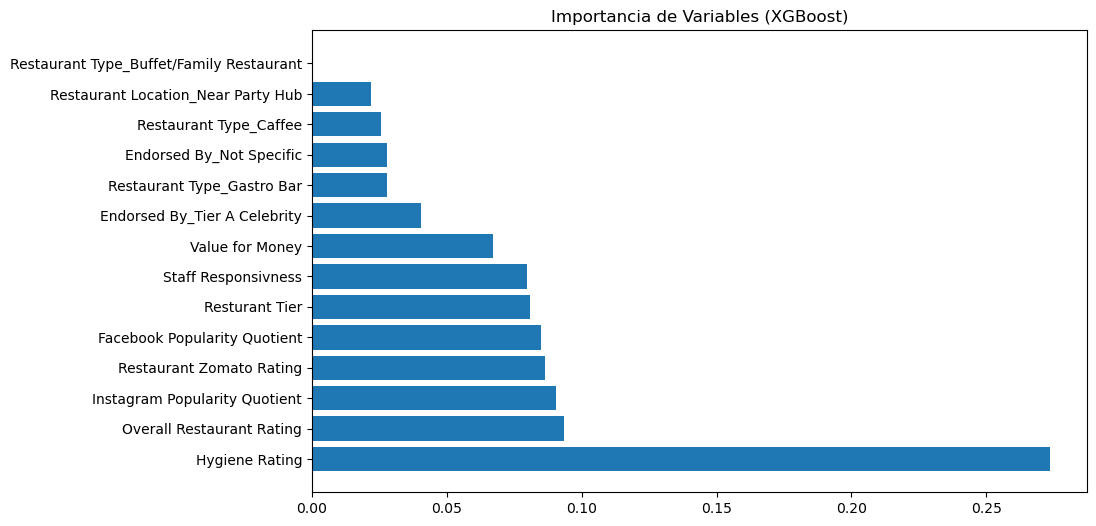

In [77]:
# 4. Análisis de importancia de variables
if hasattr(best_model.named_steps['model'], 'feature_importances_'):
    print("\n Importancia de variables:")
    importances = best_model.named_steps['model'].feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    print(importance_df)
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(f'Importancia de Variables ({best_model_name})')
    plt.show()
elif hasattr(best_model.named_steps['model'], 'coef_'):
    print("\n Coeficientes del modelo lineal:")
    coefs = best_model.named_steps['model'].coef_
    features = X.columns
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
    coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
    print(coef_df)

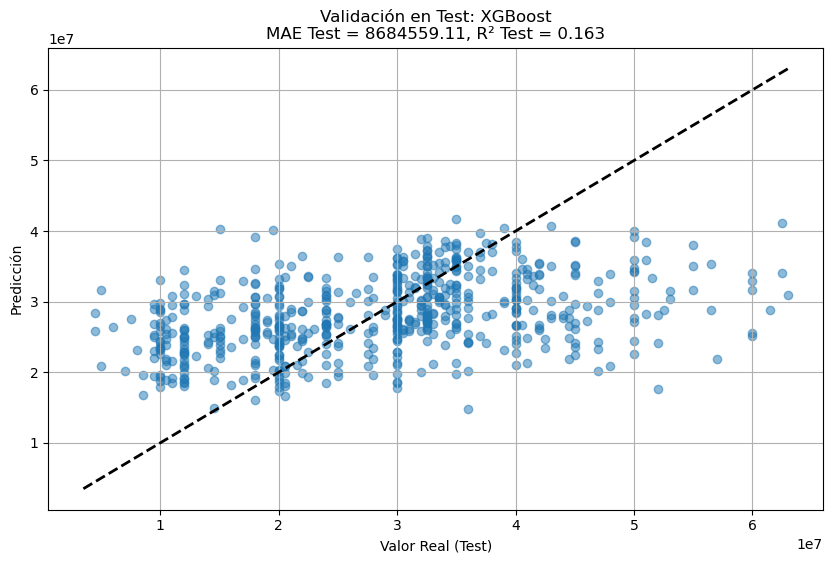

In [78]:
# 5. Validación final en test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valor Real (Test)')
plt.ylabel('Predicción')
plt.title(f'Validación en Test: {best_model_name}\nMAE Test = {results[best_model_name]["test_mae"]:.2f}, R² Test = {results[best_model_name]["test_r2"]:.3f}')
plt.grid(True)
plt.show()

## 4. Conclusiones

- Todos los modelos tienen un desempeño pobre, especialmente en el conjunto de prueba (R² Test entre 0.16 y -0.0047), lo que indica que explican muy poca o ninguna varianza de los datos.

- Hay señales de overfitting, especialmente en RandomForest y GradientBoosting, con R² Train mucho mayor que el R² Test.

- Los valores de RMSE Test son extremadamente altos (más de 11 millones en todos los modelos), lo cual sugiere que el objetivo es muy disperso y difícil de predecir con los features actuales.

- Pese a que se hizo un modelamiento con redes neuronales (adjunta evidencia abajo), siguen con rendimientos bajos.

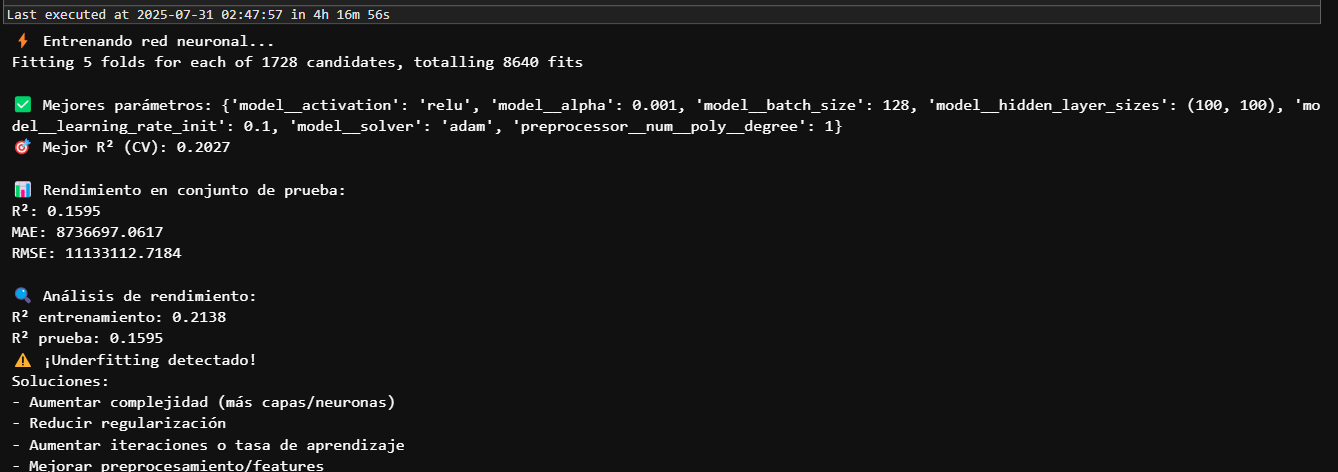